# Momentum effect: Is there an advantage to investing when a stock's acceleration is high and positive?

Momentum indicators:
1. Relative strength index (RSI) https://www.investopedia.com/terms/r/rsi.asp
2. MACD (Moving Average Convergence Divergence)https://www.investopedia.com/terms/m/macd.asp#:~:text=MACD%20is%20calculated%20by%20subtracting,an%20exponentially%20weighted%20moving%20average.
3. Price Rate of Change 
4. More indicators as desired

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_RSI(data, window):
    delta = data.diff()   
    gains, losses = delta.copy(), delta.copy()
    gains[gains < 0] = 0 # makes sure gains only contain postive values
    losses[losses > 0] = 0 # makes sure losses only contain negative values
    avg_gain = pd.Series(gains).rolling(window).mean() # calculates the rolling mean over window amount of time points
    avg_loss = pd.Series(losses).rolling(window).mean().abs()
    RSI = 100 - (100/(1+(avg_gain/avg_loss)))
    return RSI

#Strategy: if RSI < 30 the stock is oversold/undervalued, if RSI>70 the stock is overbought/overvalued
def stock_signal(rsi_series):
    latest_rsi = rsi_series.iloc[-1]  # most recent rsi value
    if latest_rsi < 30:
        return 1  # buy
    elif latest_rsi > 70:
        return -1  # sell
    else:
        return 0  # hold

#percent rate of change
def calculate_ROC(data,window):
    return data.pct_change(window)

In [2]:
tickers = ['GOOG', 'TSLA', 'META', 'NVDA', 'AAPL', 'EBAY', 'AMZN', 'NFLX', 'MSFT', 'INTC']
start_date = '2023-11-01'
end_date = '2023-12-30'

stock_data = {}
rsi_values = {}
roc_values = {}
signals = {}

for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, start=start_date, end=end_date)
    rsi_values[stock_symbol] = calculate_RSI(stock_data[stock_symbol]['Adj Close'], window=14)
    roc_values[stock_symbol] = (calculate_ROC(stock_data[stock_symbol]['Adj Close'], window = 14)*100)
    signals[stock_symbol] = stock_signal(rsi_values[stock_symbol])
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")
    print(f"Rate of change of {stock_symbol}: {roc_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    79.784396
2023-11-22    80.200671
2023-11-24    70.712441
2023-11-27    68.292679
2023-11-28    67.610425
2023-11-29    58.254456
2023-11-30    55.594570
2023-12-01    47.962577
2023-12-04    42.633390
2023-12-05    42.549020
2023-12-06    37.873540
2023-12-07    49.502203
2023-12-08    49.403800
2023-12-11    43.836155
2023-12-12    40.596703
2023-12-13    38.095227
2023-12-14    39.704678
2023-12-15    41.529176
2023-12-18    47.412233
2023-12-19    53.229523
2023-12-20    61.299206
2023-12-21    65.738644
2023-12-22    74.016655
2023-12-26    72.182037
2023-12-27    70.915196
2023-12-28    58.289393
2023-12-29    63.74120

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of NVDA: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    86.458064
2023-11-22    74.818984
2023-11-24    63.942847
2023-11-27    62.897392
2023-11-28    59.449040
2023-11-29    58.178415
2023-11-30    49.148366
2023-12-01    41.456245
2023-12-04    34.691855
2023-12-05    34.846425
2023-12-06    33.864942
2023-12-07    36.883652
2023-12-08    42.363886
2023-12-11    33.537791
2023-12-12    40.519545
2023-12-13    47.225881
2023-12-14    52.736715
2023-12-15    53.065697
2023-12-18    59.909911
2023-12-19    56.351690
2023-12-20    55.757728
2023-12-21    58.877466
2023-12-22    64.502643
2023-12-26    62.503451
2023-12-27    69.719881
2023-12-28    66.371974
2023-12-29    62.55918

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    64.705856
2023-11-22    67.142837
2023-11-24    66.477713
2023-11-27    66.272880
2023-11-28    59.694770
2023-11-29    59.481228
2023-11-30    63.003283
2023-12-01    59.088518
2023-12-04    55.539136
2023-12-05    52.821317
2023-12-06    53.492078
2023-12-07    59.693627
2023-12-08    55.870025
2023-12-11    49.389610
2023-12-12    59.411149
2023-12-13    56.061442
2023-12-14    51.793230
2023-12-15    55.458102
2023-12-18    64.715729
2023-12-19    65.900329
2023-12-20    62.093849
2023-12-21    63.243858
2023-12-22    67.919790
2023-12-26    64.901866
2023-12-27    72.477032
2023-12-28    68.786107
2023-12-29    62.41757

[*********************100%%**********************]  1 of 1 completed

RSI of INTC: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    76.962594
2023-11-22    76.212098
2023-11-24    75.904140
2023-11-27    76.582811
2023-11-28    75.138111
2023-11-29    82.742536
2023-11-30    81.826580
2023-12-01    72.718835
2023-12-04    67.913034
2023-12-05    61.674394
2023-12-06    53.235284
2023-12-07    42.805799
2023-12-08    43.416365
2023-12-11    48.929317
2023-12-12    52.288349
2023-12-13    54.870146
2023-12-14    56.380778
2023-12-15    59.980808
2023-12-18    56.797032
2023-12-19    57.818190
2023-12-20    54.545449
2023-12-21    63.893514
2023-12-22    74.458916
2023-12-26    81.497845
2023-12-27    85.865504
2023-12-28    82.389989
2023-12-29    80.66617

In [3]:
stock_data['GOOG'].head() # the dataframe from yfinance

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,125.339996,127.739998,124.925003,127.570000,127.424995,26536600
2023-11-02,129.559998,130.089996,128.110001,128.580002,128.433853,24091700
2023-11-03,129.089996,130.729996,129.009995,130.369995,130.221802,19517900
2023-11-06,130.220001,131.559998,129.929993,131.449997,131.300583,15360400
2023-11-07,131.979996,133.279999,131.139999,132.399994,132.249496,19223800


In [4]:
initial_investment_per_stock = {}
for ticker in tickers:
    investment = float(input(f"Enter initial investment amount for {ticker}: $"))
    initial_investment_per_stock[ticker] = investment

Enter initial investment amount for GOOG: $100
Enter initial investment amount for TSLA: $100
Enter initial investment amount for META: $100
Enter initial investment amount for NVDA: $100
Enter initial investment amount for AAPL: $100
Enter initial investment amount for EBAY: $100
Enter initial investment amount for AMZN: $100
Enter initial investment amount for NFLX: $100
Enter initial investment amount for MSFT: $100
Enter initial investment amount for INTC: $100


In [6]:
def simulate_investment(stock_data, initial_investment_per_stock, start_date, end_date):
    investment_values = {}
    
    for ticker, data in stock_data.items():
        initial_investment = initial_investment_per_stock[ticker]
        
        for date in data.index: # each date in the dataframe to process each day
            rsi = calculate_RSI(data.loc[:date, 'Adj Close'], window=14).iloc[-1] # gets closing price from start of dataframe to current date 
            signal = stock_signal(pd.Series(rsi))
            
            initial_price = data.loc[date, 'Open']
            final_price = data.loc[date, 'Adj Close']
            
            shares_bought = initial_investment/initial_price
            current_value = shares_bought * final_price
            
            # these are the signals calculated from the rsi
            if signal == 1:  #buy
                investment_values[ticker] -= current_value * shares_bought
                print(f"Buying {ticker} at {initial_price} on {date}")
            elif signal == -1:  #sell
                investment_values[ticker] += current_value * shares_bought
                print(f"Selling {ticker} at {final_price} on {date}")
            else: #hold
                investment_values[ticker] = current_value * shares_bought
                print(f"Holding {ticker} at {final_price} on {date}")
    return investment_values

simulate_investment(stock_data, initial_investment_per_stock, start_date, end_date)

Holding GOOG at 127.42499542236328 on 2023-11-01 00:00:00
Holding GOOG at 128.43385314941406 on 2023-11-02 00:00:00
Holding GOOG at 130.2218017578125 on 2023-11-03 00:00:00
Holding GOOG at 131.3005828857422 on 2023-11-06 00:00:00
Holding GOOG at 132.24949645996094 on 2023-11-07 00:00:00
Holding GOOG at 133.1085205078125 on 2023-11-08 00:00:00
Holding GOOG at 131.54031372070312 on 2023-11-09 00:00:00
Holding GOOG at 133.90762329101562 on 2023-11-10 00:00:00
Holding GOOG at 133.48809814453125 on 2023-11-13 00:00:00
Holding GOOG at 135.27606201171875 on 2023-11-14 00:00:00
Holding GOOG at 136.22499084472656 on 2023-11-15 00:00:00
Holding GOOG at 138.54234313964844 on 2023-11-16 00:00:00
Holding GOOG at 136.7843475341797 on 2023-11-17 00:00:00
Holding GOOG at 137.7632293701172 on 2023-11-20 00:00:00
Selling GOOG at 138.46243286132812 on 2023-11-21 00:00:00
Selling GOOG at 139.86085510253906 on 2023-11-22 00:00:00
Selling GOOG at 138.06289672851562 on 2023-11-24 00:00:00
Holding GOOG at 137

Holding MSFT at 373.912841796875 on 2023-12-28 00:00:00
Holding MSFT at 374.6700744628906 on 2023-12-29 00:00:00
Holding INTC at 36.90924072265625 on 2023-11-01 00:00:00
Holding INTC at 37.315059661865234 on 2023-11-02 00:00:00
Holding INTC at 37.75056457519531 on 2023-11-03 00:00:00
Holding INTC at 37.68601989746094 on 2023-11-06 00:00:00
Holding INTC at 38.50031280517578 on 2023-11-07 00:00:00
Holding INTC at 37.65622329711914 on 2023-11-08 00:00:00
Holding INTC at 37.53705978393555 on 2023-11-09 00:00:00
Holding INTC at 38.58968734741211 on 2023-11-10 00:00:00
Holding INTC at 37.96406936645508 on 2023-11-13 00:00:00
Holding INTC at 39.1358642578125 on 2023-11-14 00:00:00
Holding INTC at 40.3275146484375 on 2023-11-15 00:00:00
Holding INTC at 43.0484504699707 on 2023-11-16 00:00:00
Holding INTC at 43.50525665283203 on 2023-11-17 00:00:00
Holding INTC at 44.42878723144531 on 2023-11-20 00:00:00
Selling INTC at 43.3364372253418 on 2023-11-21 00:00:00
Selling INTC at 43.36622619628906 o

{'GOOG': 71.12869450600238,
 'TSLA': 38.18303916255595,
 'META': 196.23999506989557,
 'NVDA': 199.5523011034785,
 'AAPL': 51.0740550348293,
 'EBAY': 228.9745590652206,
 'AMZN': 64.82189350712964,
 'NFLX': 20.247628420756573,
 'MSFT': 26.501674574389614,
 'INTC': 1227.1574624310779}

GOOG
0


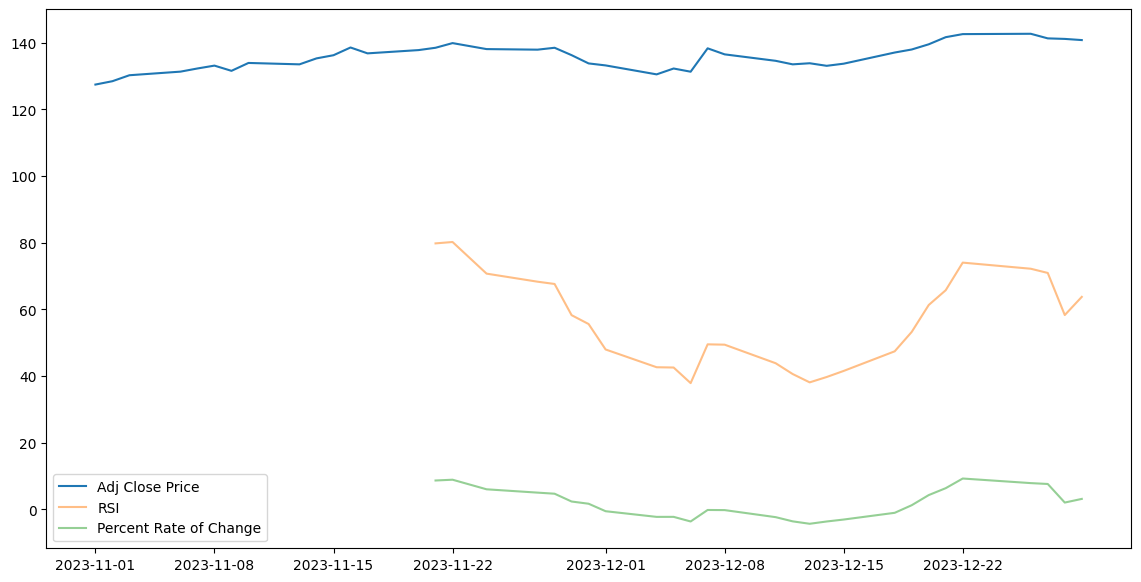

TSLA
0


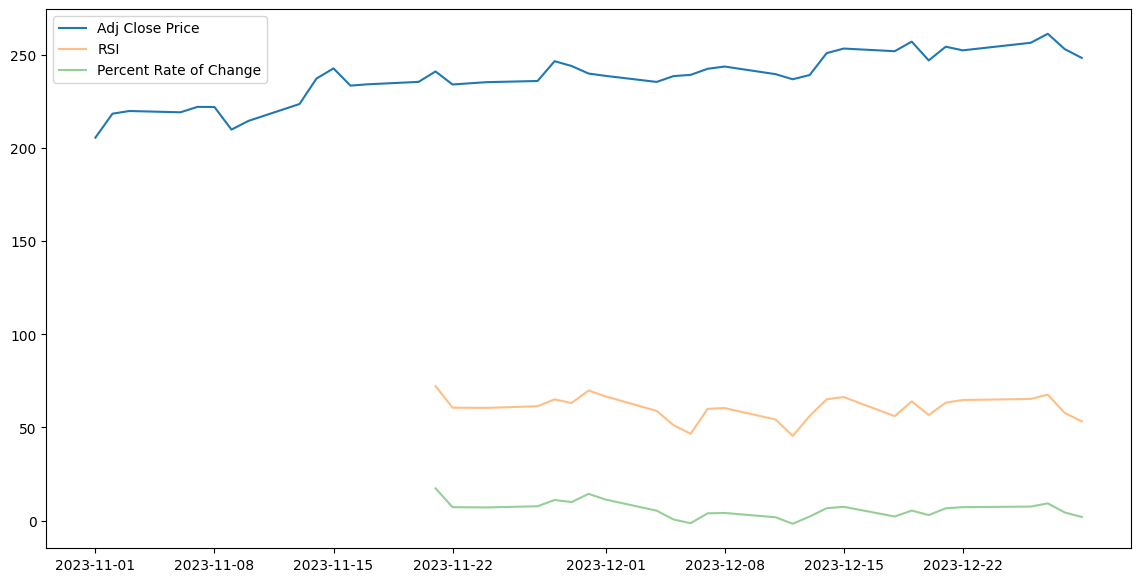

META
-1


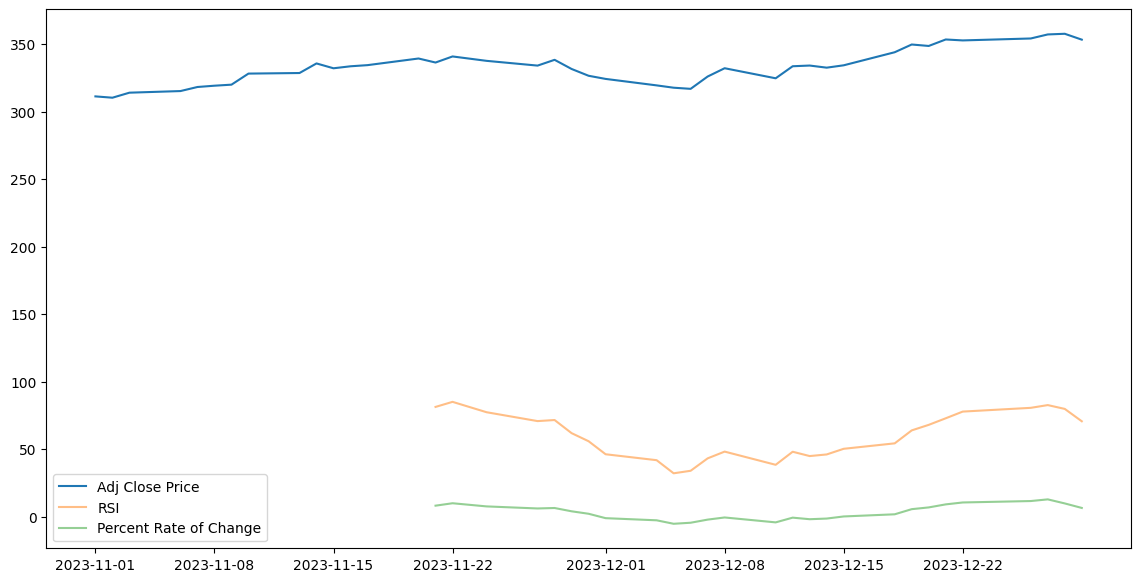

NVDA
0


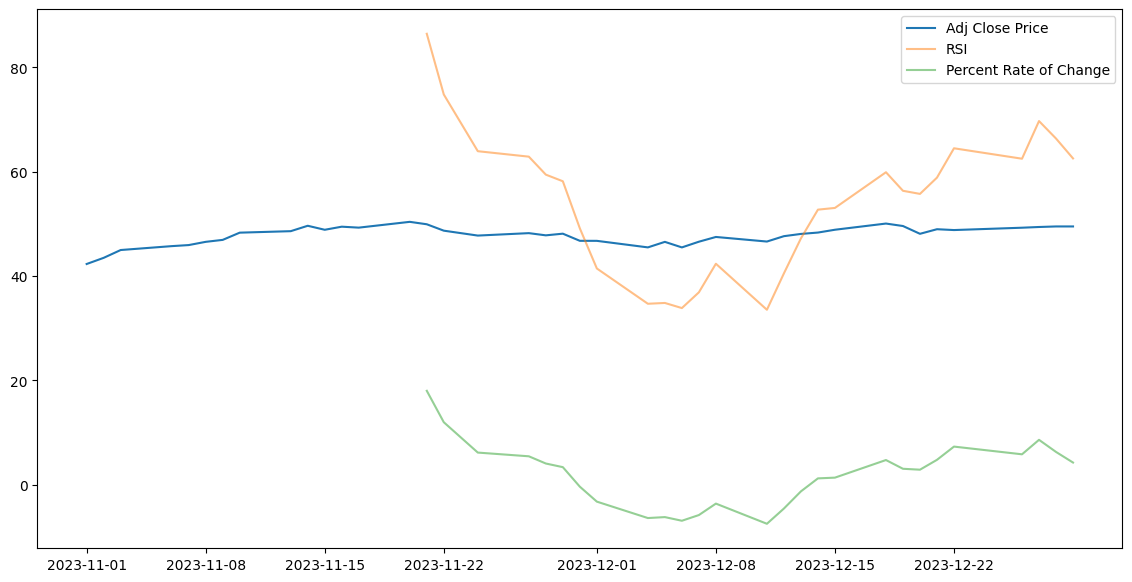

AAPL
0


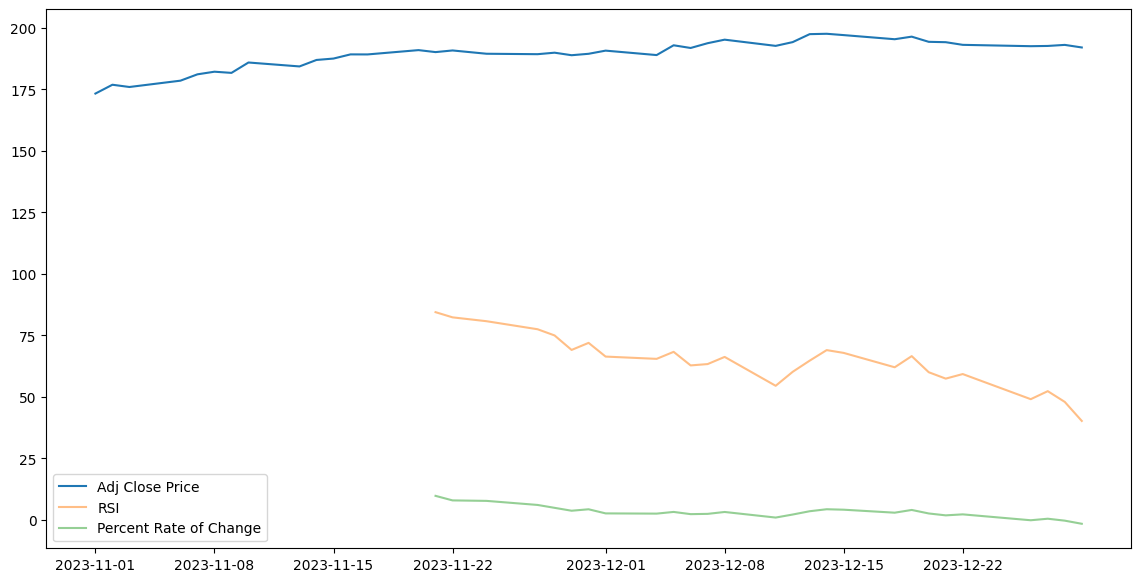

EBAY
0


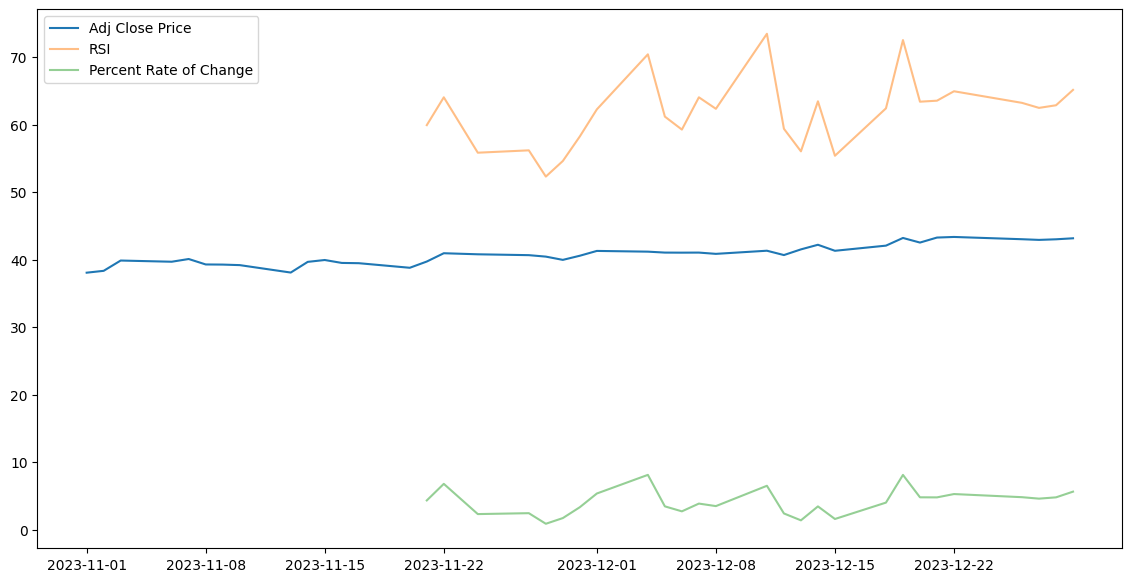

AMZN
0


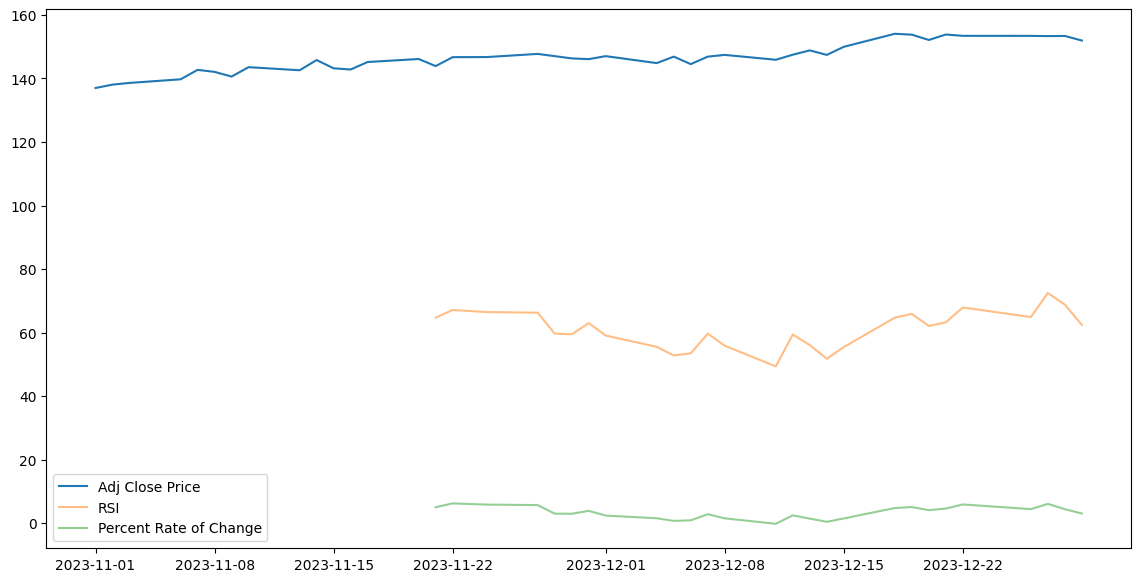

NFLX
0


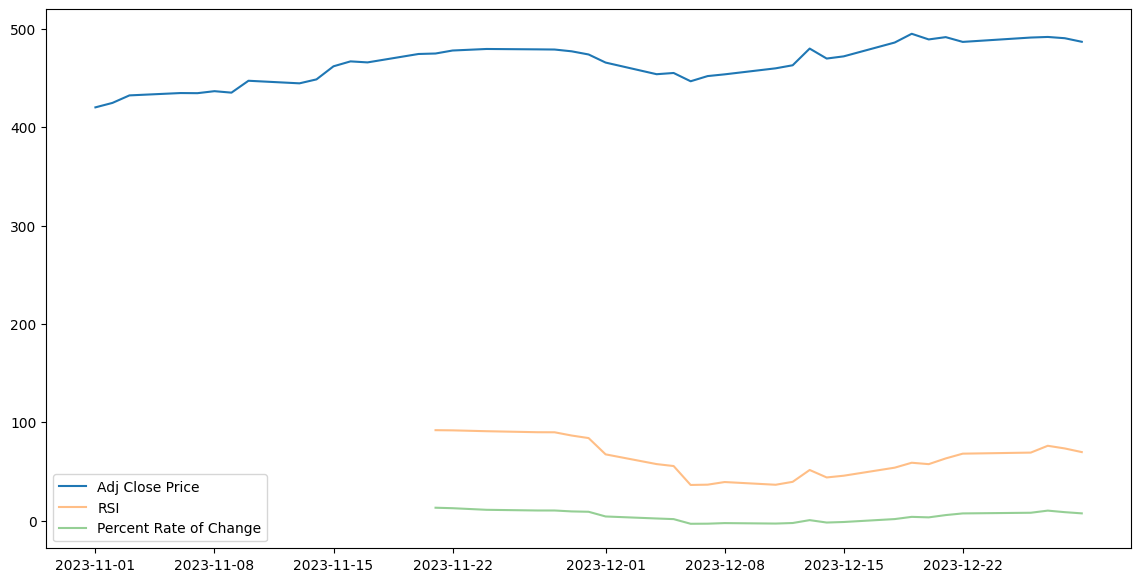

MSFT
0


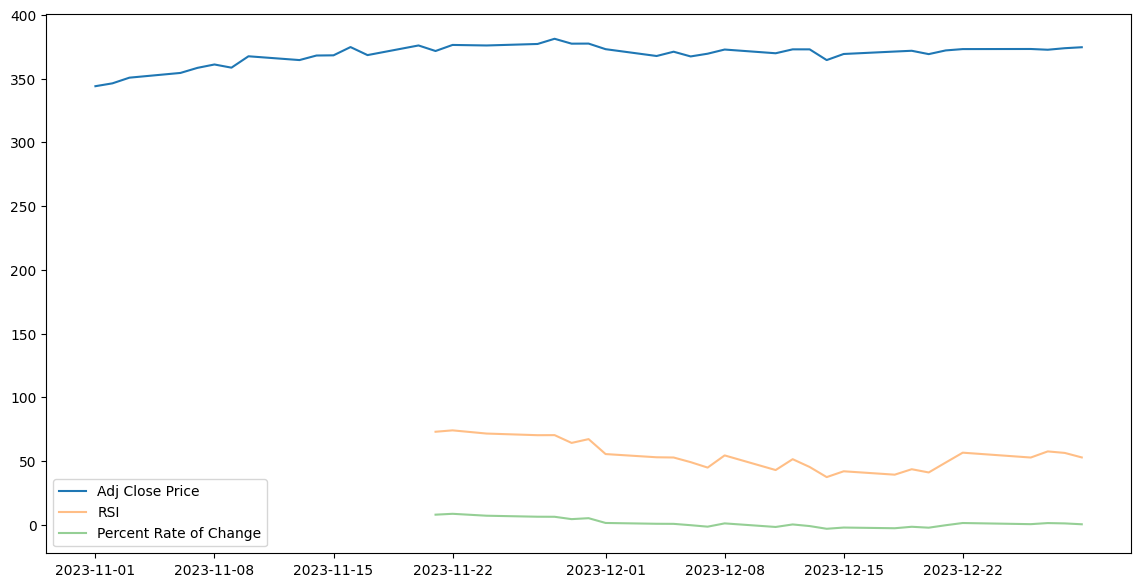

INTC
-1


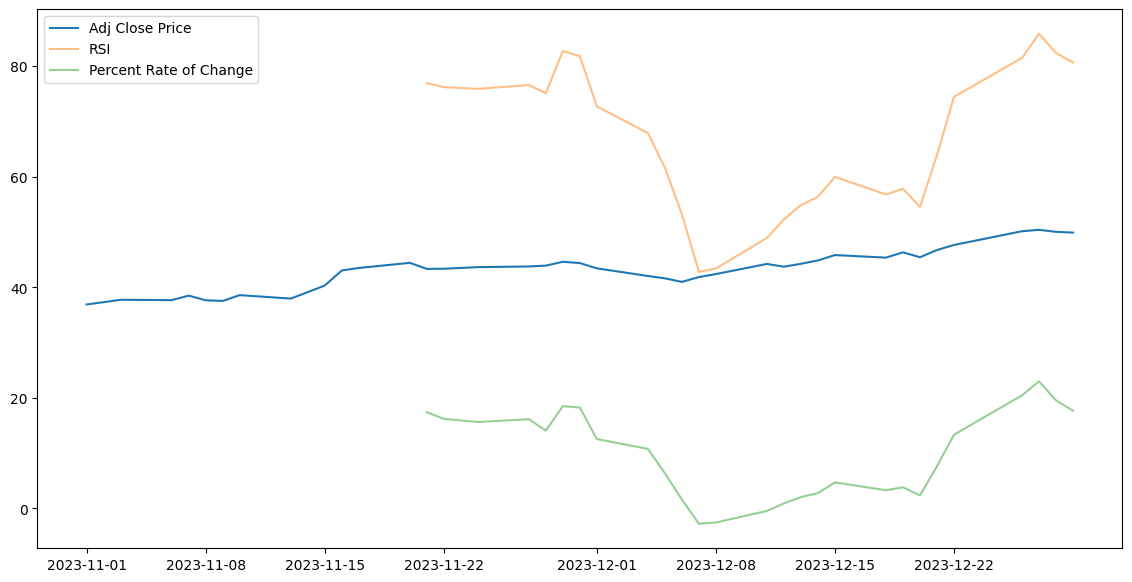

In [7]:
for stock_symbol in tickers:
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock_symbol]['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    plt.plot(roc_values[stock_symbol], label='Percent Rate of Change', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

GOOG
0


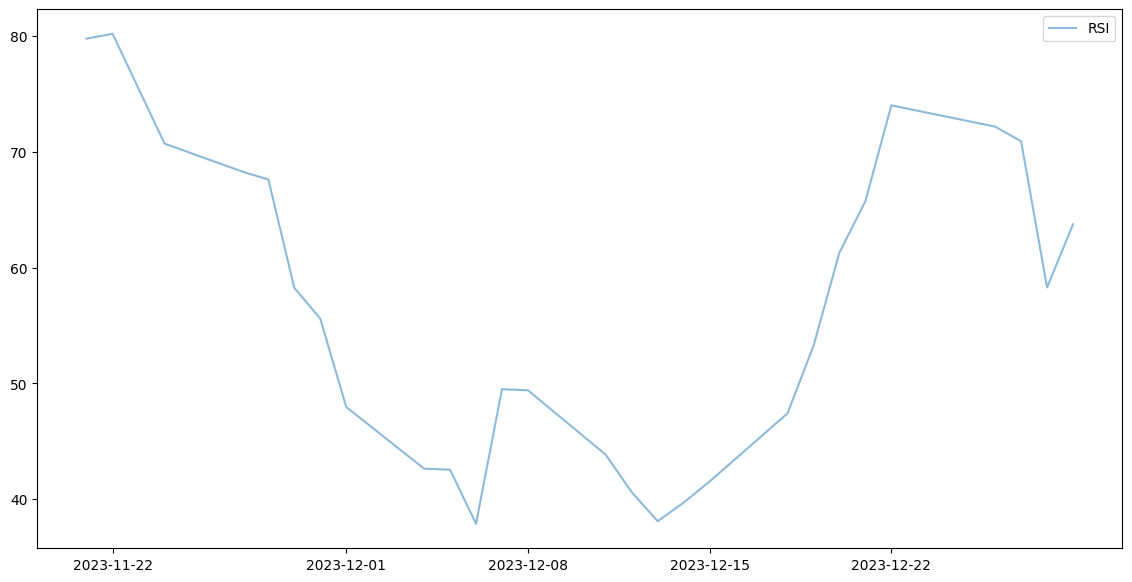

TSLA
0


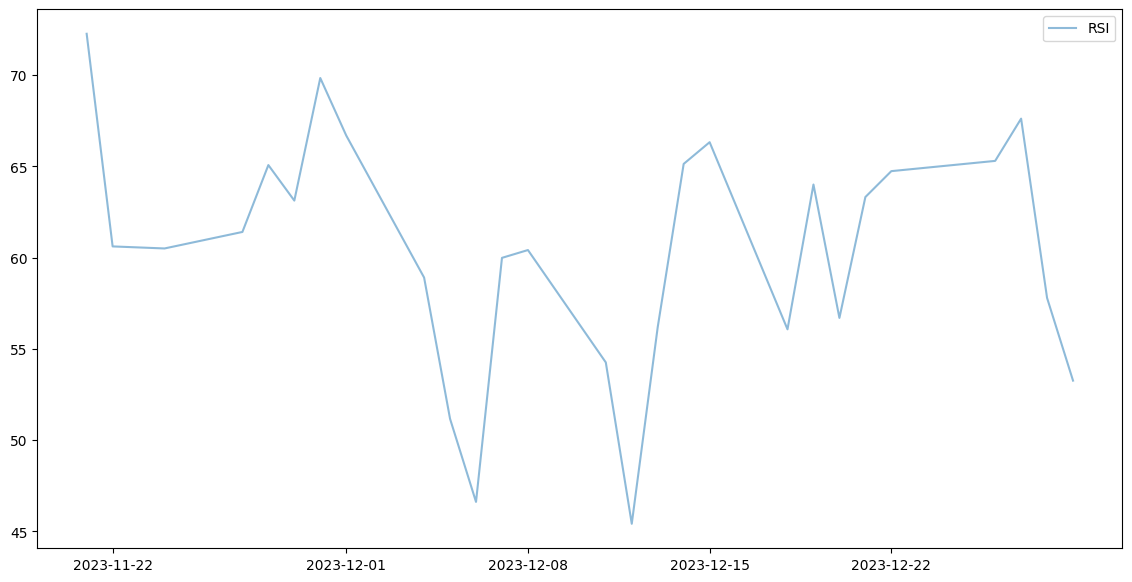

META
-1


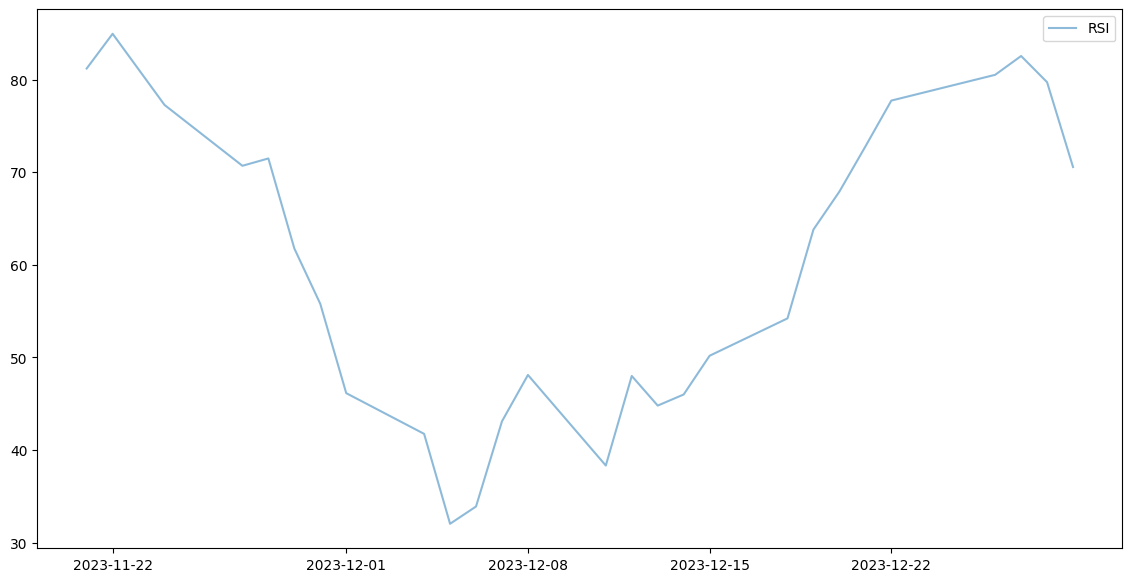

NVDA
0


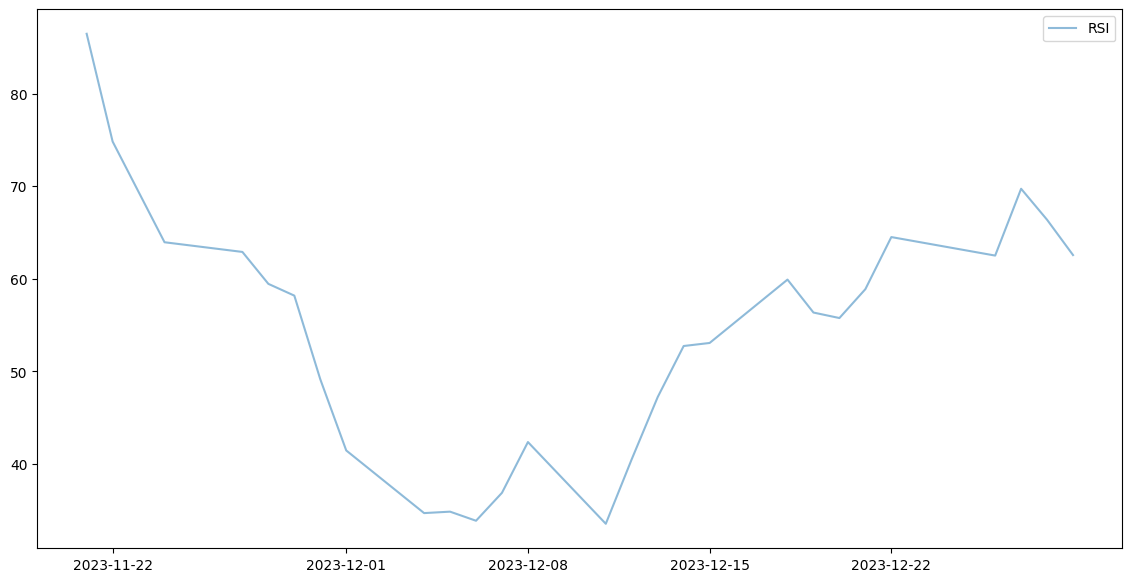

AAPL
0


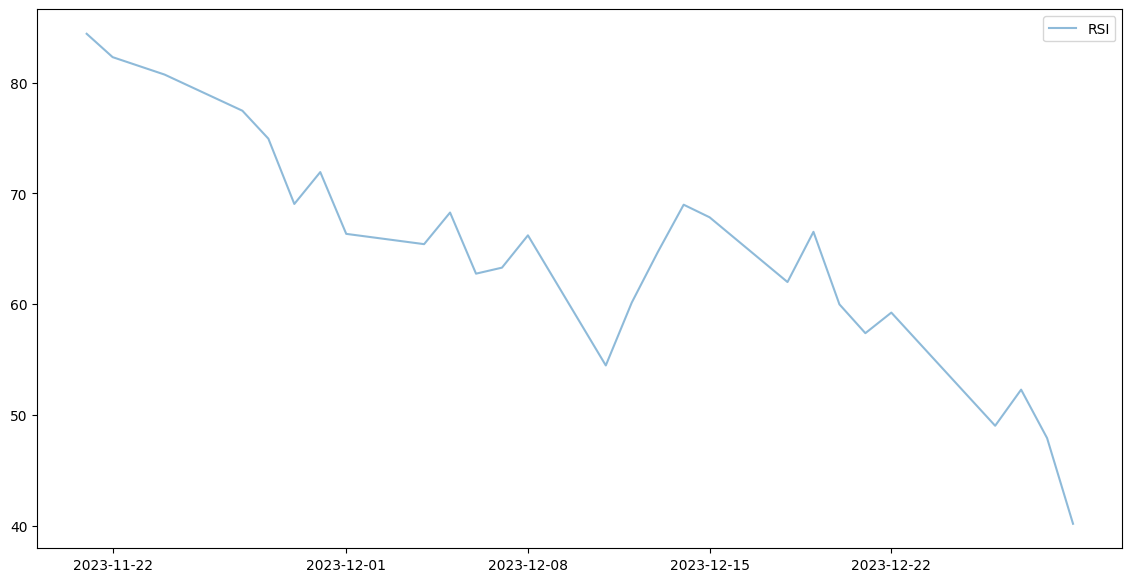

EBAY
0


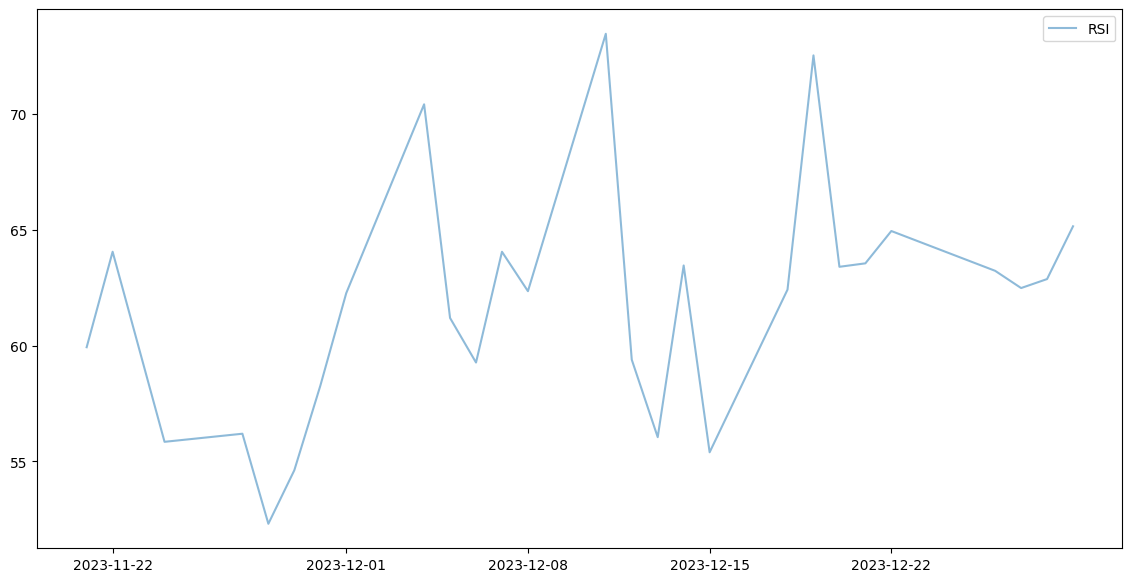

AMZN
0


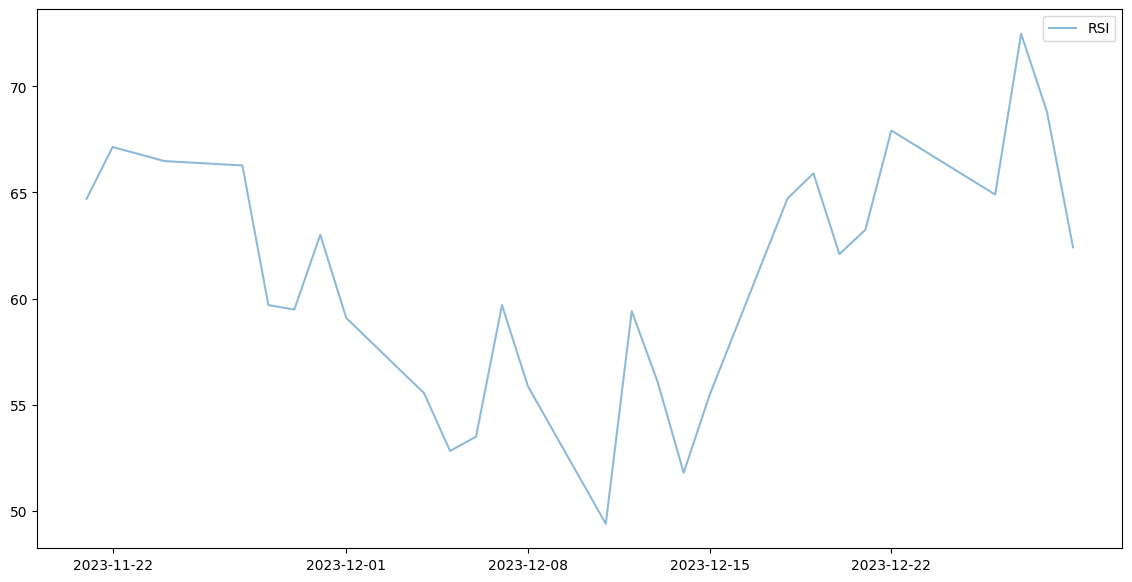

NFLX
0


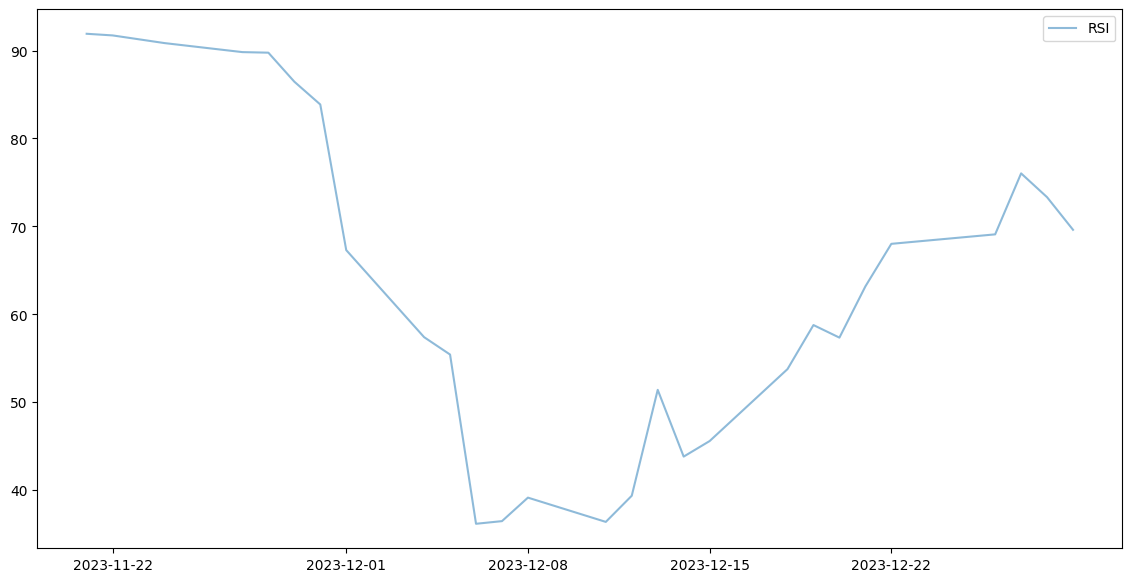

MSFT
0


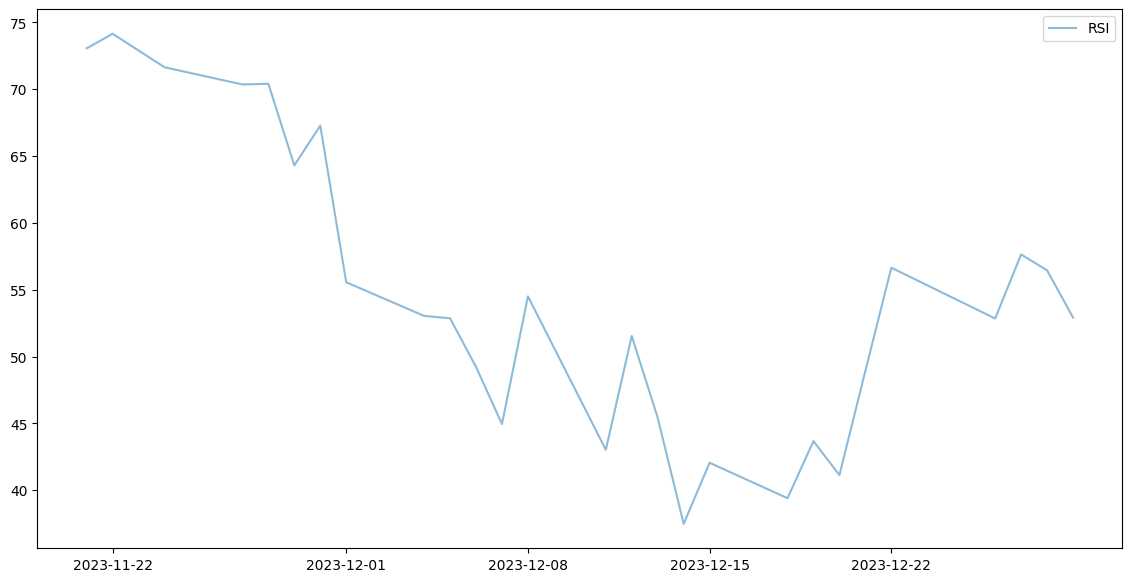

INTC
-1


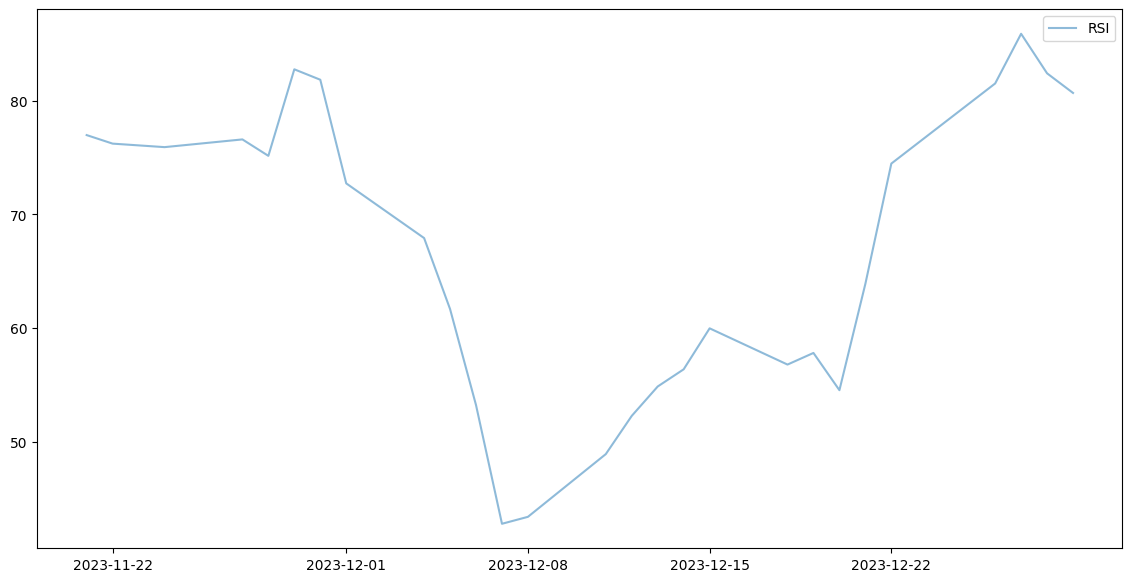

In [8]:
for stock_symbol in tickers:
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

In [9]:
# 1 minute intervals over 5 days
for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, period = "5d",  interval = "1m")
    rsi_values[stock_symbol] = calculate_RSI(stock_data[stock_symbol]['Adj Close'], window=14)
    roc_values[stock_symbol] = (calculate_ROC(stock_data[stock_symbol]['Adj Close'], window = 14)*100)
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    15.789514
2024-06-28 15:56:00-04:00    11.830901
2024-06-28 15:57:00-04:00    13.943593
2024-06-28 15:58:00-04:00    15.023676
2024-06-28 15:59:00-04:00    14.545707
Name: Adj Close, Length: 1949, dtype: float64
RSI of TSLA: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    77.353753
2024-06-28 15:56:00-04:00    76.156540
2024-06-28 15:57:00-04:00    73.971763
2024-06-28 15:58:00-04:00    72.115421
2024-06-28 15:59:00-04:00    72.410128
Name: Adj Close, Length: 1949, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of META: Datetime
2024-06-24 09:30:00-04:00         NaN
2024-06-24 09:31:00-04:00         NaN
2024-06-24 09:32:00-04:00         NaN
2024-06-24 09:33:00-04:00         NaN
2024-06-24 09:34:00-04:00         NaN
                               ...   
2024-06-28 15:55:00-04:00    9.523083
2024-06-28 15:56:00-04:00    7.719840
2024-06-28 15:57:00-04:00    3.323440
2024-06-28 15:58:00-04:00    7.404187
2024-06-28 15:59:00-04:00    6.131311
Name: Adj Close, Length: 1949, dtype: float64
RSI of NVDA: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    52.008247
2024-06-28 15:56:00-04:00    43.628695
2024-06-28 15:57:00-04:00    35.615949
2024-06-28 15:58:00-04:00    39.516872
2024-06-28 15:59:00-04:00    33.033874
Name: Adj Close, Length: 1949, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AAPL: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    26.330749
2024-06-28 15:56:00-04:00    13.187119
2024-06-28 15:57:00-04:00    14.852667
2024-06-28 15:58:00-04:00    13.762251
2024-06-28 15:59:00-04:00    12.811741
Name: Adj Close, Length: 1949, dtype: float64
RSI of EBAY: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    60.975632
2024-06-28 15:56:00-04:00    56.639547
2024-06-28 15:57:00-04:00    52.010636
2024-06-28 15:58:00-04:00    49.329611
2024-06-28 15:59:00-04:00    53.768738
Name: Adj Close, Length: 1948, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    42.062204
2024-06-28 15:56:00-04:00    39.655412
2024-06-28 15:57:00-04:00    41.489421
2024-06-28 15:58:00-04:00    43.338505
2024-06-28 15:59:00-04:00    46.508169
Name: Adj Close, Length: 1949, dtype: float64
RSI of NFLX: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    41.412321
2024-06-28 15:56:00-04:00    44.033964
2024-06-28 15:57:00-04:00    38.303637
2024-06-28 15:58:00-04:00    40.450315
2024-06-28 15:59:00-04:00    38.914275
Name: Adj Close, Length: 1906, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSI of MSFT: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    14.770233
2024-06-28 15:56:00-04:00    11.306594
2024-06-28 15:57:00-04:00     3.990888
2024-06-28 15:58:00-04:00     3.512655
2024-06-28 15:59:00-04:00     3.269481
Name: Adj Close, Length: 1949, dtype: float64
RSI of INTC: Datetime
2024-06-24 09:30:00-04:00          NaN
2024-06-24 09:31:00-04:00          NaN
2024-06-24 09:32:00-04:00          NaN
2024-06-24 09:33:00-04:00          NaN
2024-06-24 09:34:00-04:00          NaN
                               ...    
2024-06-28 15:55:00-04:00    48.106031
2024-06-28 15:56:00-04:00    48.399055
2024-06-28 15:57:00-04:00    50.895903
2024-06-28 15:58:00-04:00    54.826570
2024-06-28 15:59:00-04:00    50.896251
Name: Adj Close, Length: 1949, dtype: float64


[*********************100%%**********************]  1 of 1 completed


GOOG
0


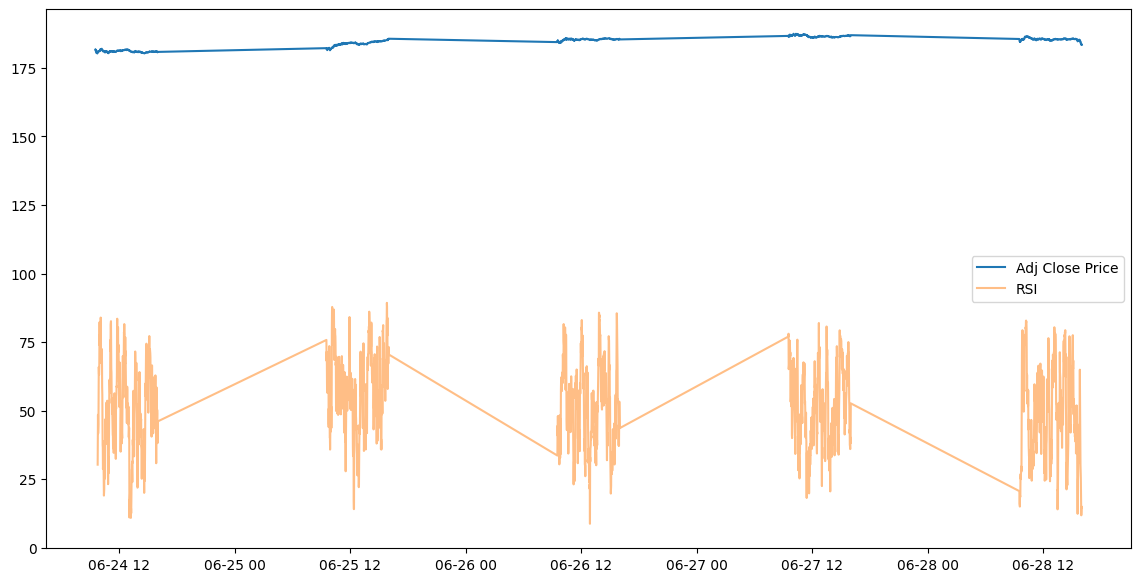

[*********************100%%**********************]  1 of 1 completed


TSLA
0


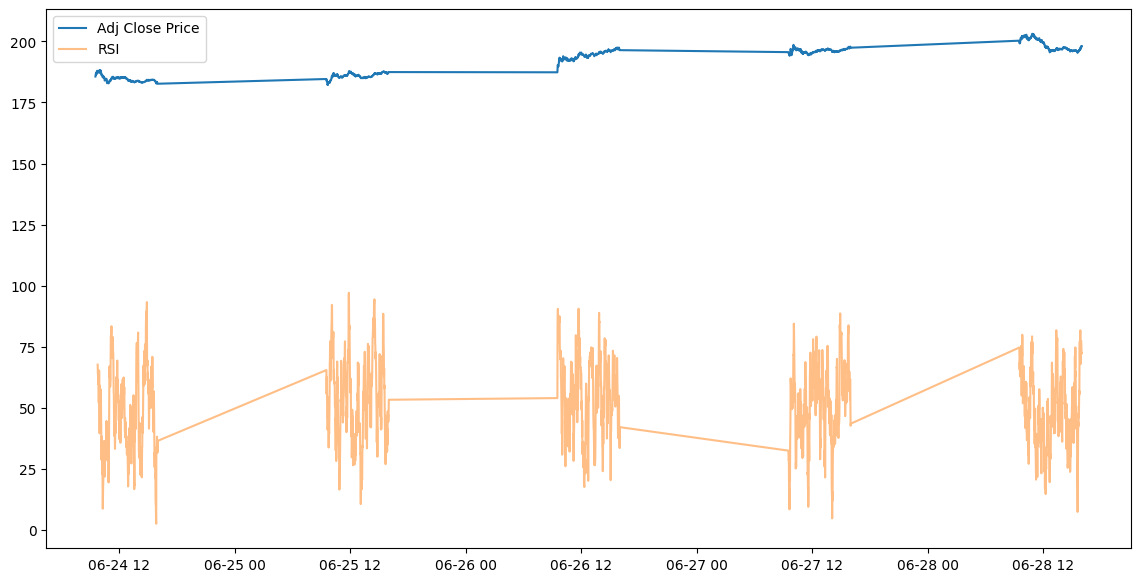

[*********************100%%**********************]  1 of 1 completed


META
-1


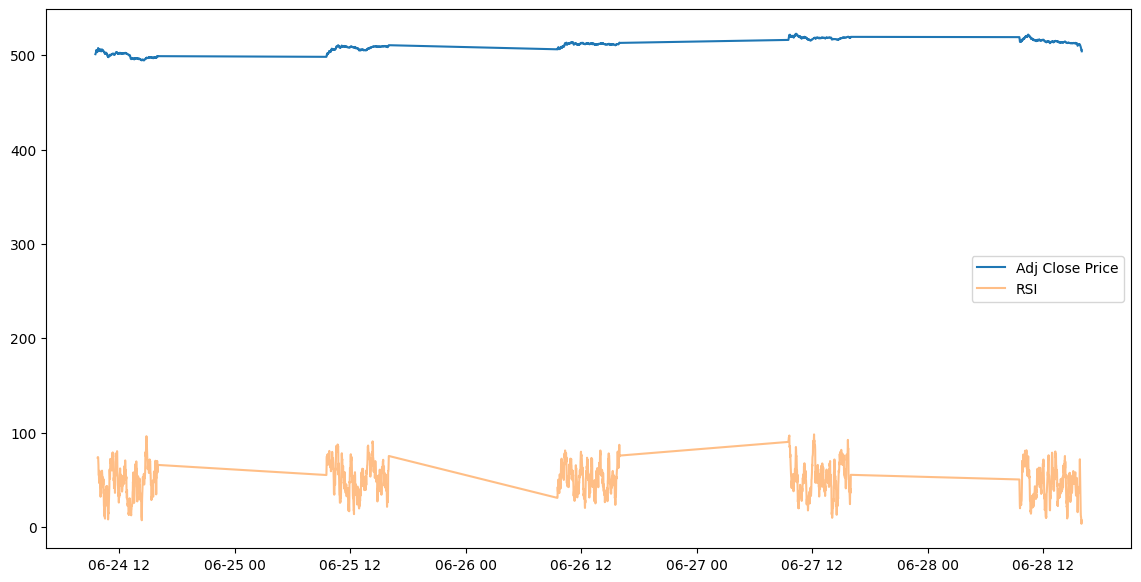

[*********************100%%**********************]  1 of 1 completed


NVDA
0


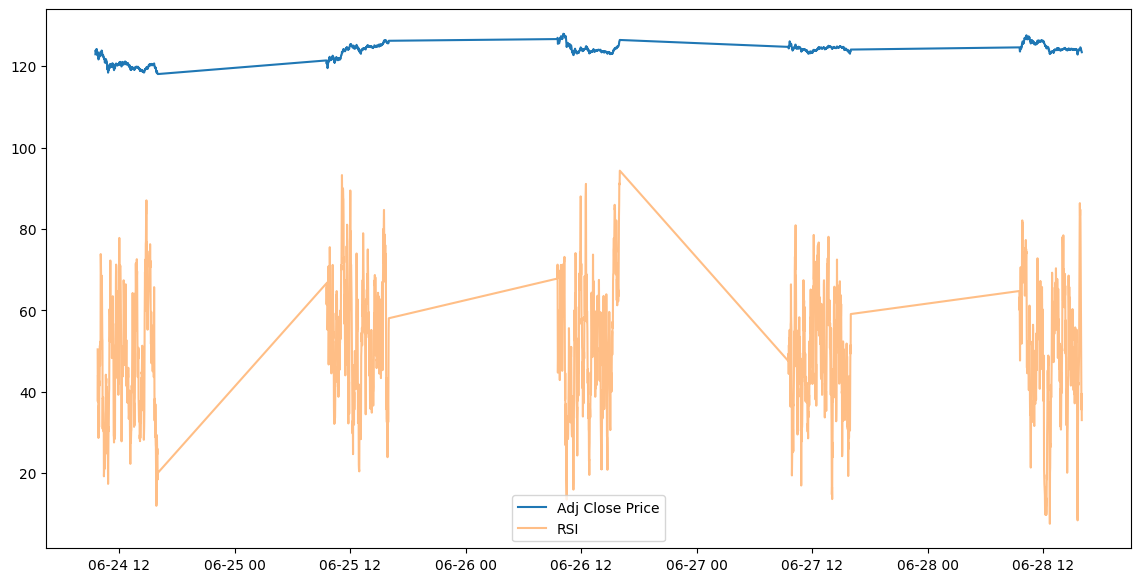

[*********************100%%**********************]  1 of 1 completed


AAPL
0


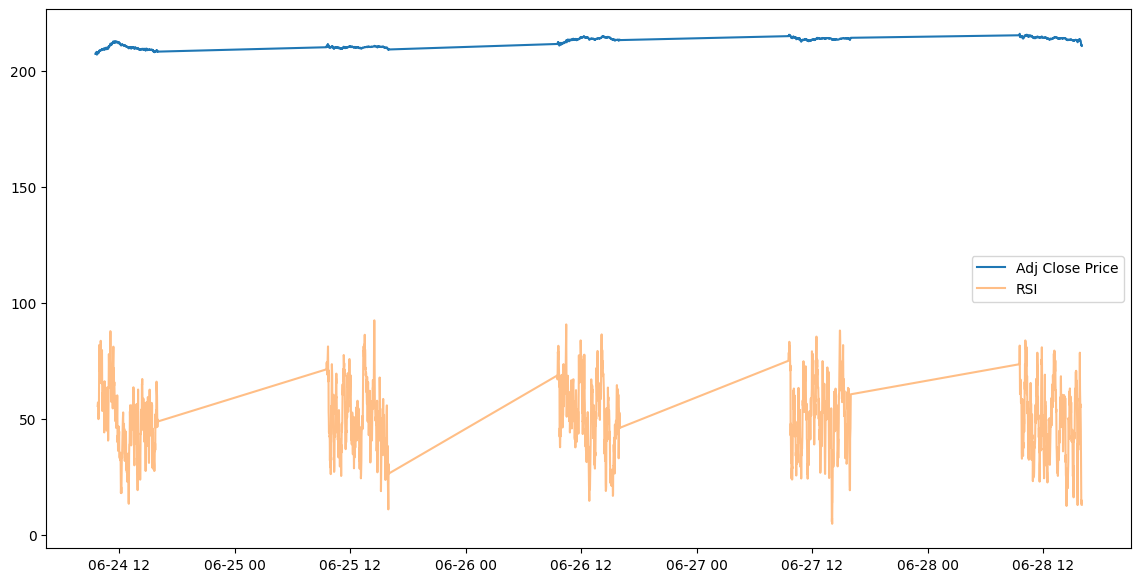

[*********************100%%**********************]  1 of 1 completed


EBAY
0


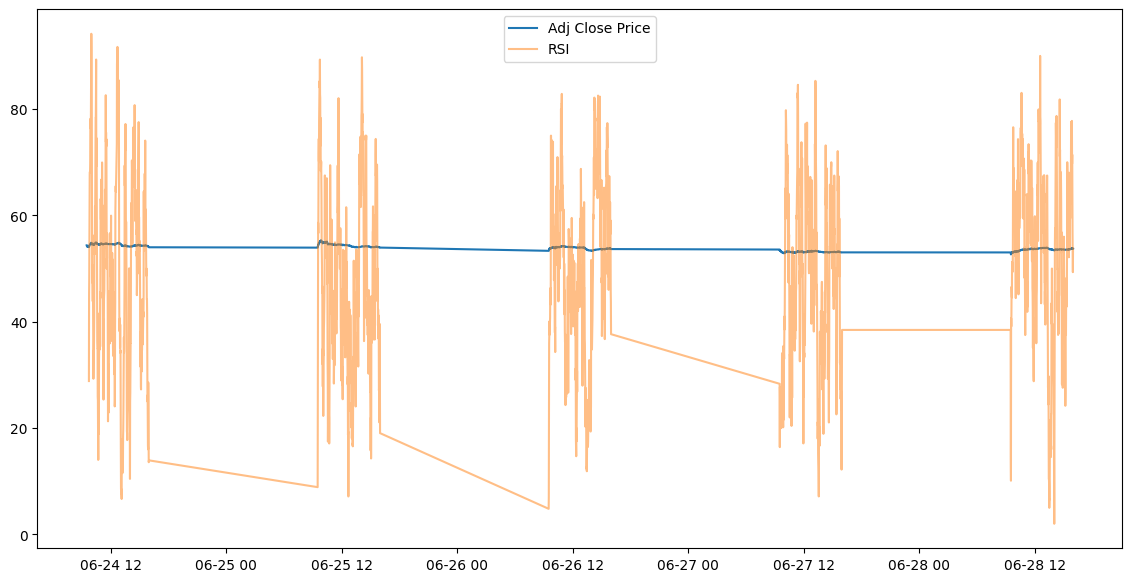

[*********************100%%**********************]  1 of 1 completed


AMZN
0


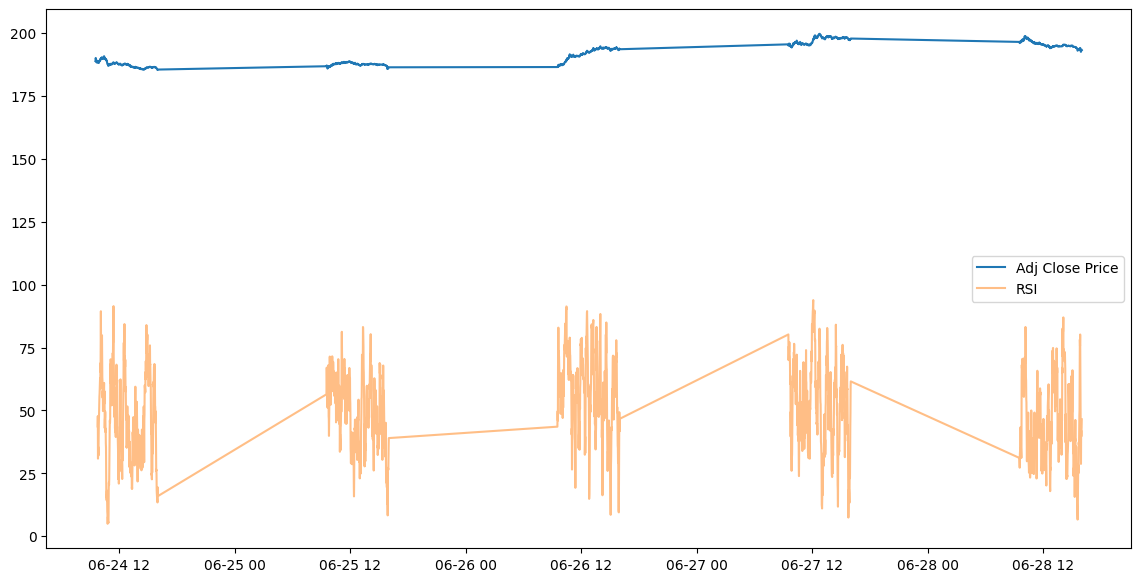

[*********************100%%**********************]  1 of 1 completed


NFLX
0


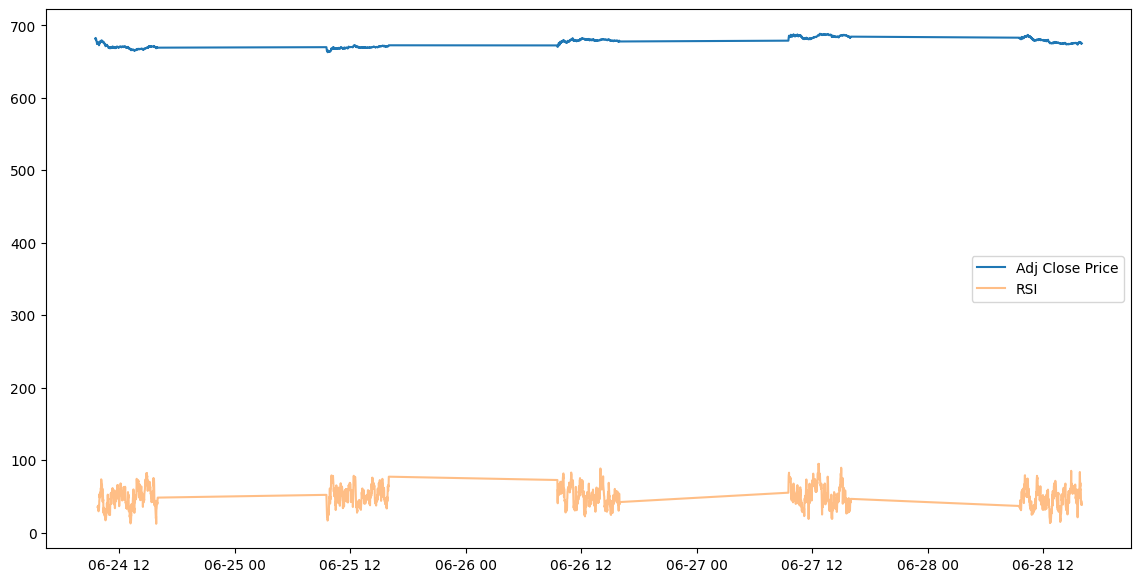

[*********************100%%**********************]  1 of 1 completed

MSFT
0


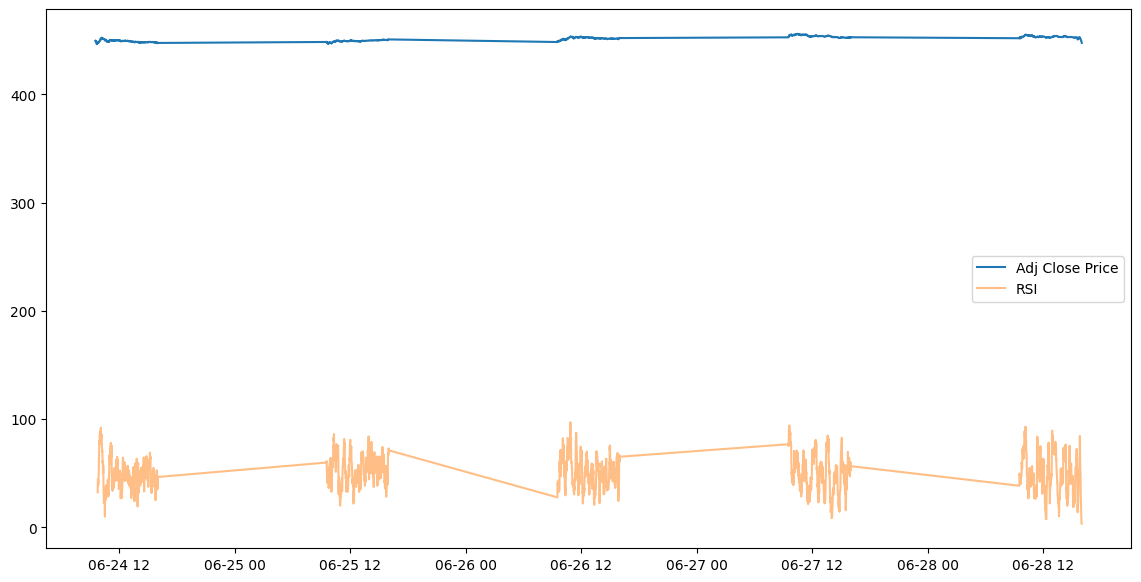

[*********************100%%**********************]  1 of 1 completed


INTC
-1


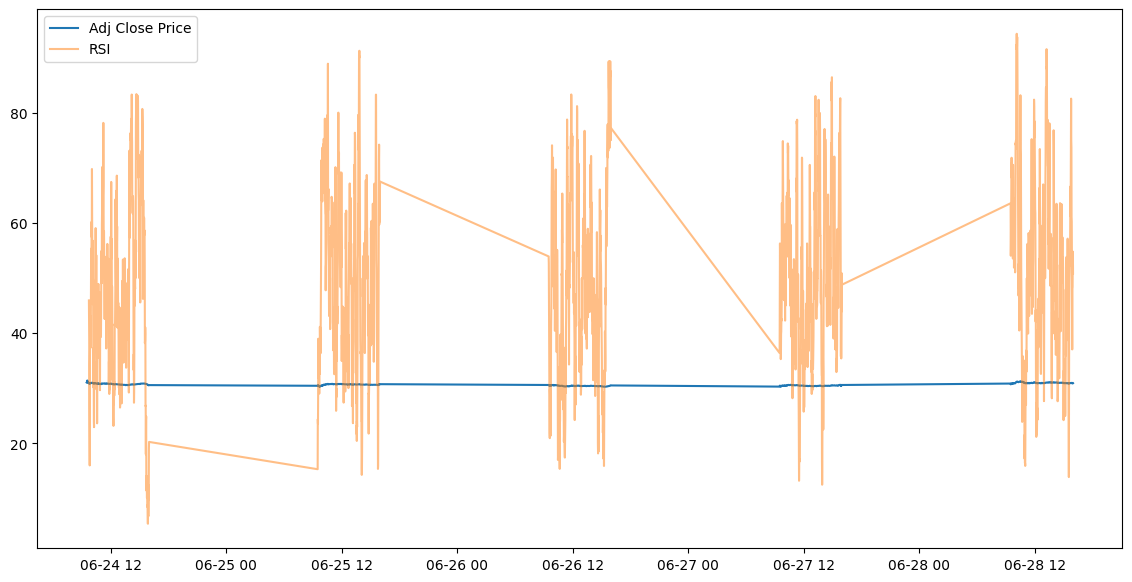

In [10]:
for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, period = "5d",  interval = "1m")
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock_symbol]['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed

GOOG
0


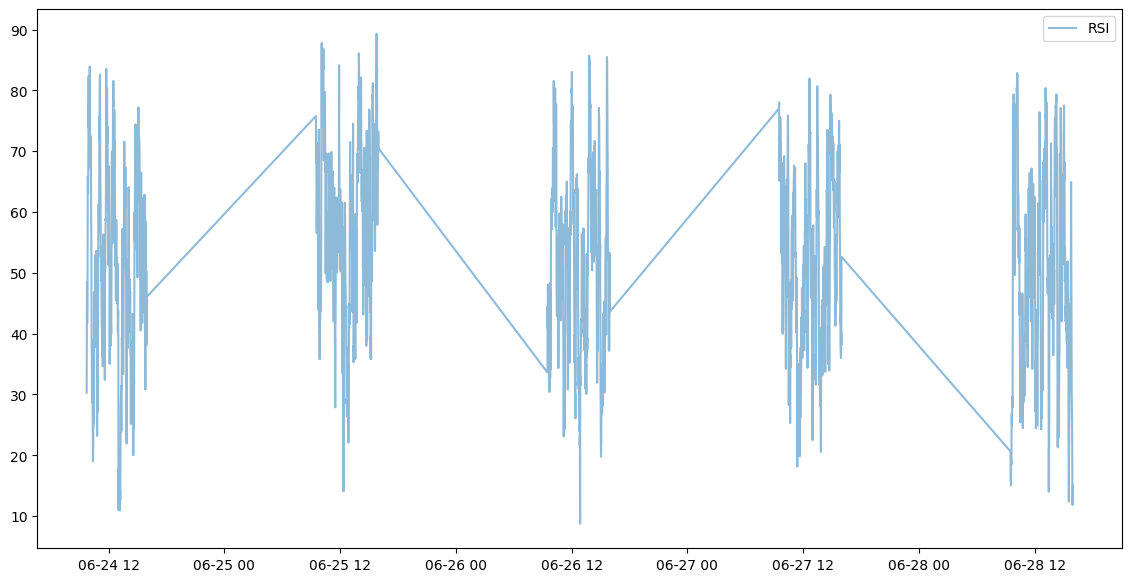

[*********************100%%**********************]  1 of 1 completed

TSLA
0


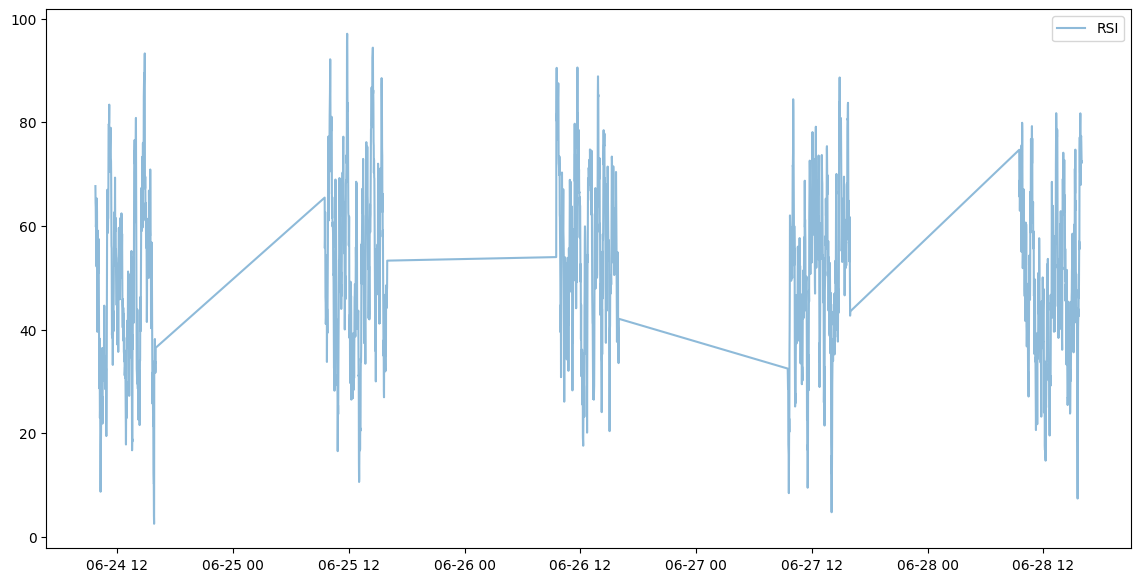

[*********************100%%**********************]  1 of 1 completed

META
-1


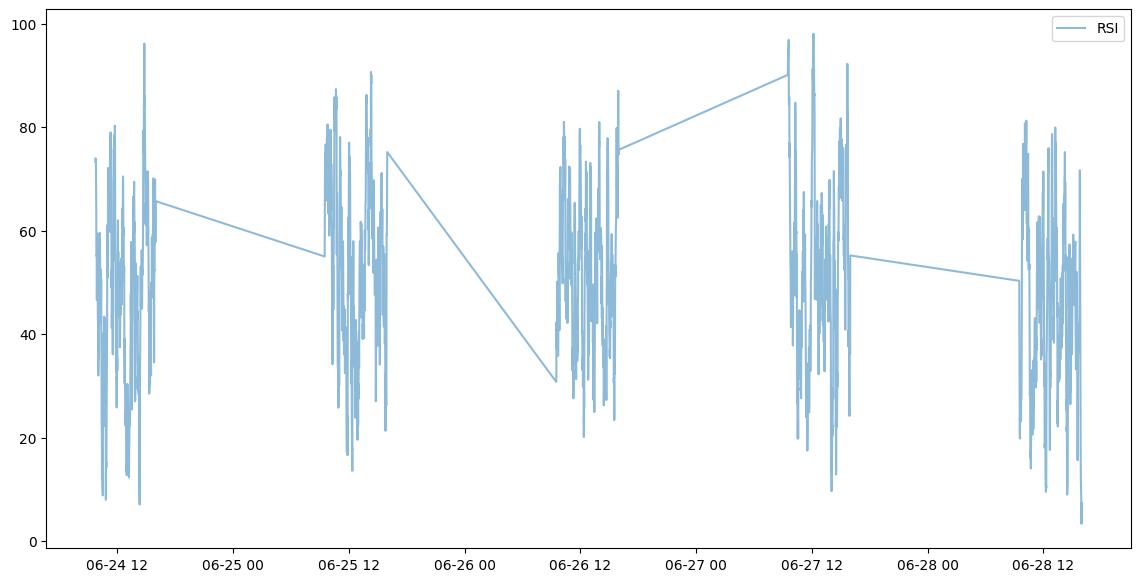

[*********************100%%**********************]  1 of 1 completed

NVDA
0


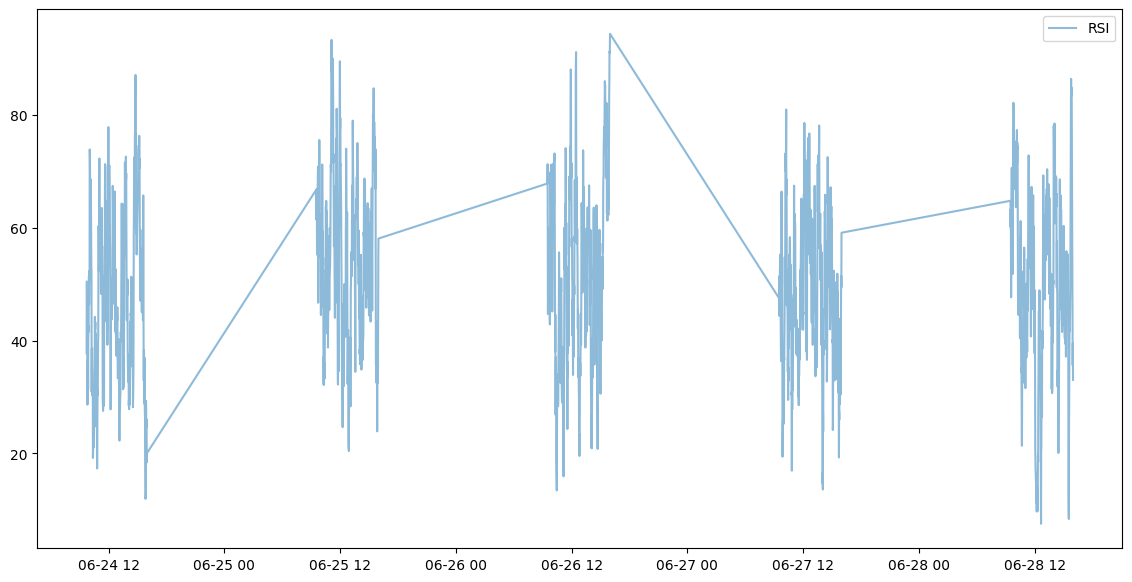

[*********************100%%**********************]  1 of 1 completed

AAPL
0


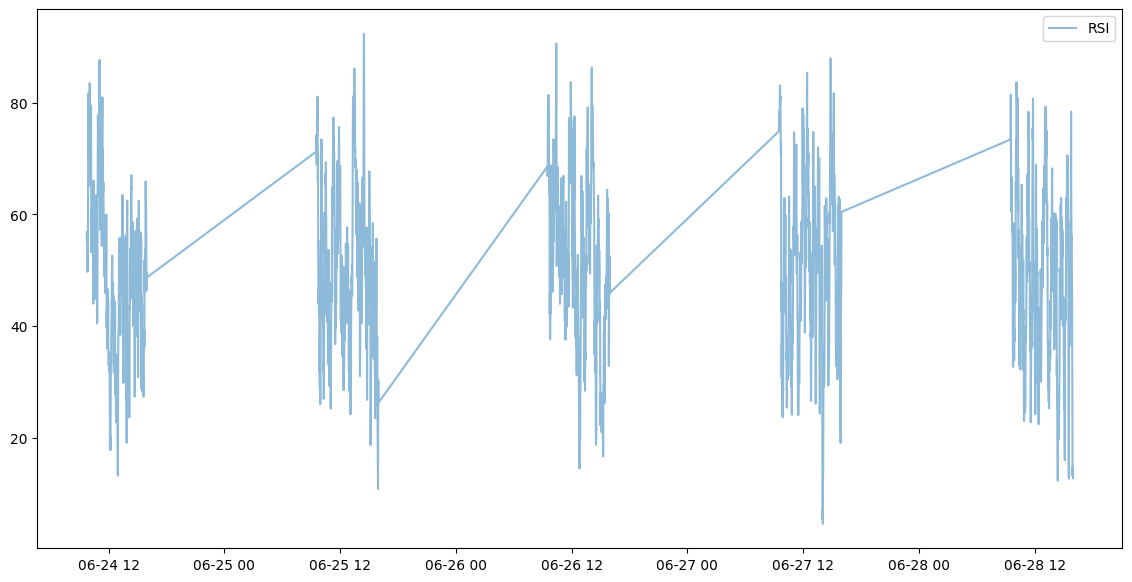

[*********************100%%**********************]  1 of 1 completed

EBAY
0


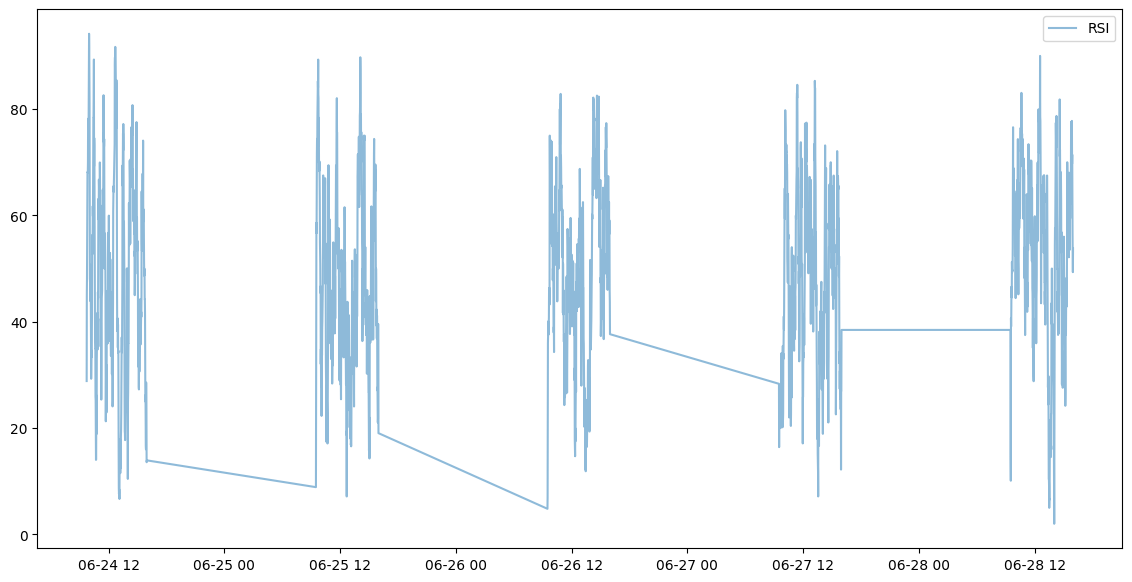

[*********************100%%**********************]  1 of 1 completed

AMZN
0


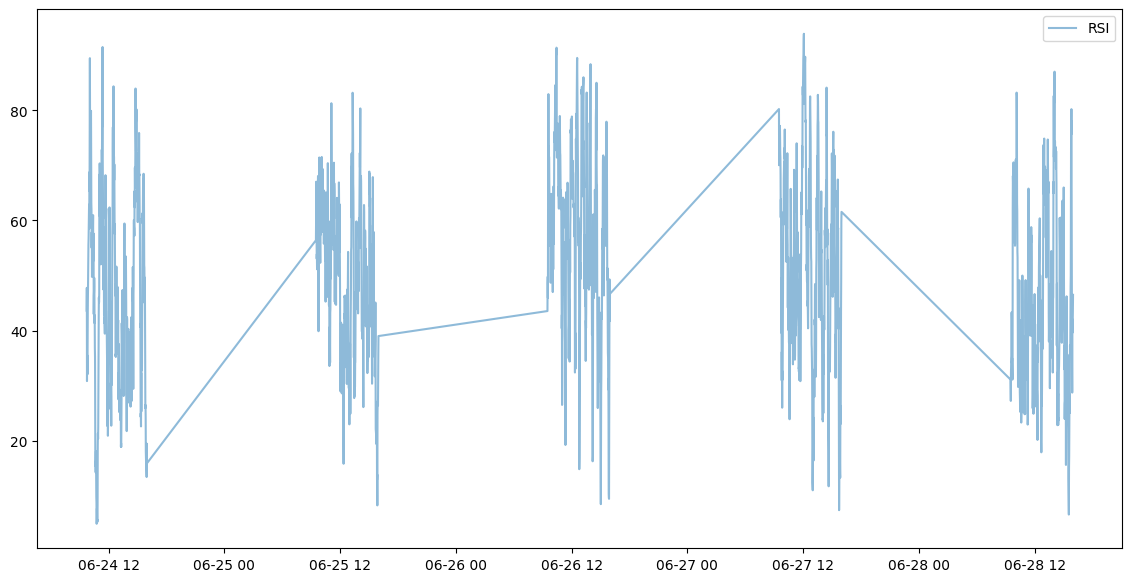

[*********************100%%**********************]  1 of 1 completed

NFLX
0


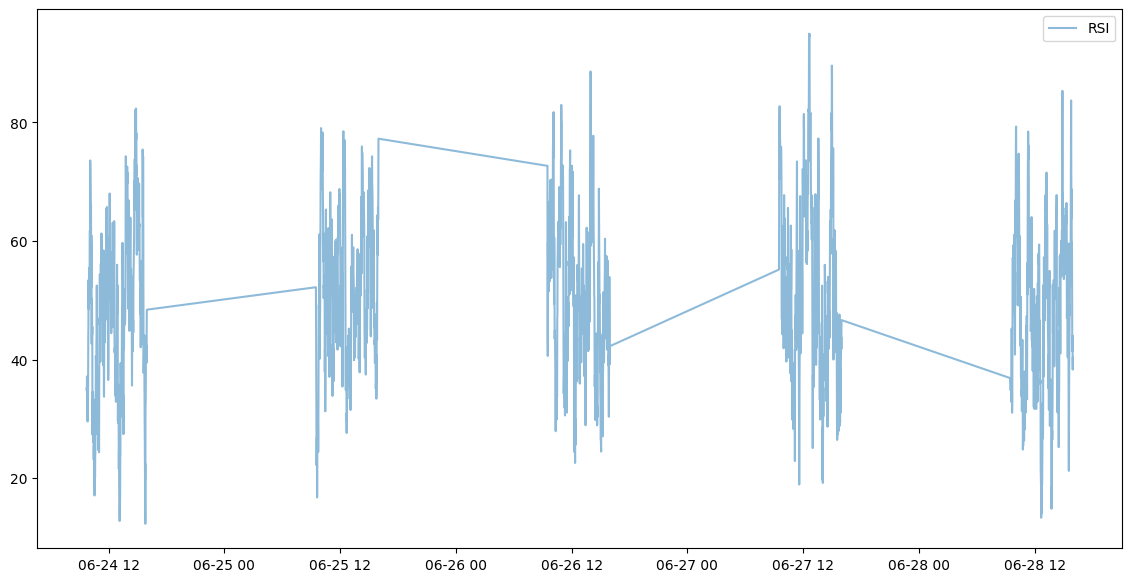

[*********************100%%**********************]  1 of 1 completed

MSFT
0


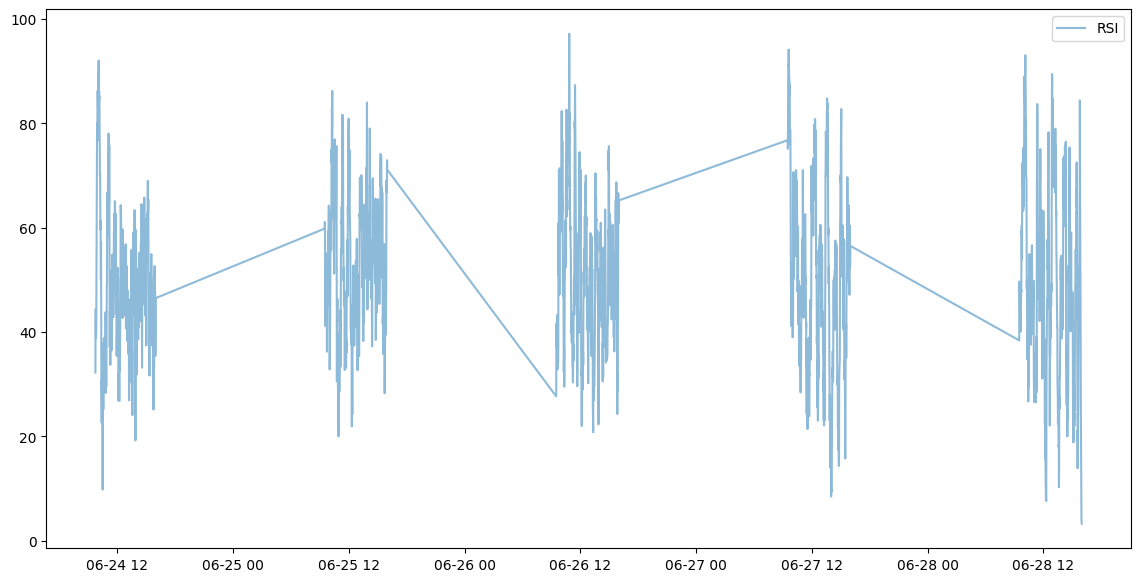

[*********************100%%**********************]  1 of 1 completed

INTC
-1


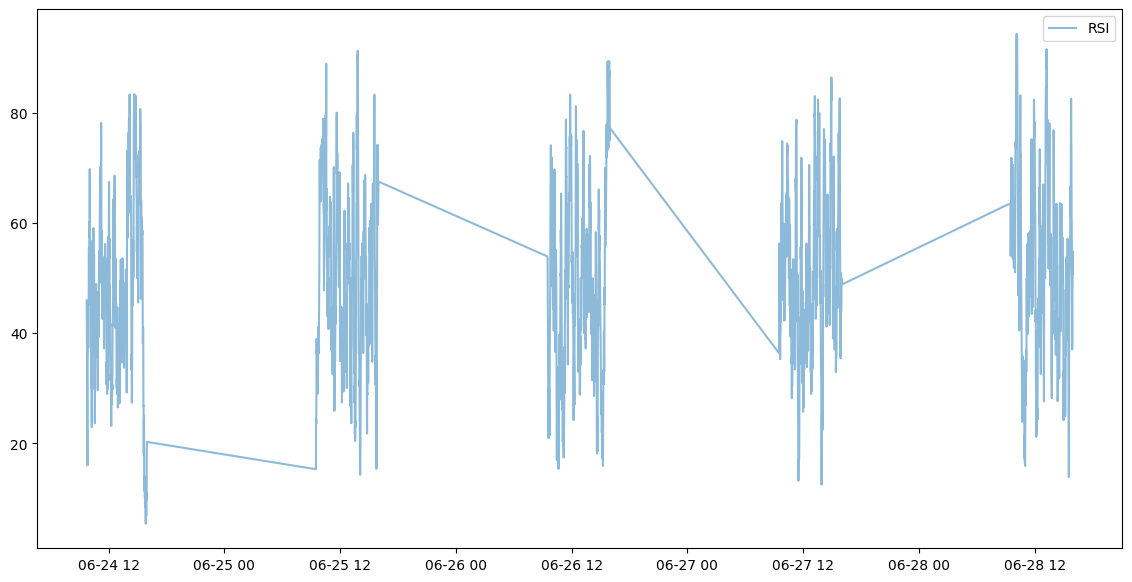

In [11]:
for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, period = "5d",  interval = "1m")
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

In [12]:
# 60 minute interval over 5 days
for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, period = "5d",  interval = "60m")
    rsi_values[stock_symbol] = calculate_RSI(stock_data[stock_symbol]['Adj Close'], window=14) 
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Datetime
2024-06-24 09:30:00          NaN
2024-06-24 10:30:00          NaN
2024-06-24 11:30:00          NaN
2024-06-24 12:30:00          NaN
2024-06-24 13:30:00          NaN
2024-06-24 14:30:00          NaN
2024-06-24 15:30:00          NaN
2024-06-25 09:30:00          NaN
2024-06-25 10:30:00          NaN
2024-06-25 11:30:00          NaN
2024-06-25 12:30:00          NaN
2024-06-25 13:30:00          NaN
2024-06-25 14:30:00          NaN
2024-06-25 15:30:00          NaN
2024-06-26 09:30:00    76.816157
2024-06-26 10:30:00    75.882117
2024-06-26 11:30:00    75.355582
2024-06-26 12:30:00    78.234714
2024-06-26 13:30:00    82.555022
2024-06-26 14:30:00    77.279164
2024-06-26 15:30:00    77.537119
2024-06-27 09:30:00    75.746330
2024-06-27 10:30:00    69.616620
2024-06-27 11:30:00    62.228263
2024-06-27 12:30:00    69.334475
2024-06-27 13:30:00    60.751861
2024-06-27 14:30:00    61.926651
2024-06-27 15:30:00    59.390935
2024-06-28 09:30:00    55.917052
2024-06-28 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of META: Datetime
2024-06-24 09:30:00          NaN
2024-06-24 10:30:00          NaN
2024-06-24 11:30:00          NaN
2024-06-24 12:30:00          NaN
2024-06-24 13:30:00          NaN
2024-06-24 14:30:00          NaN
2024-06-24 15:30:00          NaN
2024-06-25 09:30:00          NaN
2024-06-25 10:30:00          NaN
2024-06-25 11:30:00          NaN
2024-06-25 12:30:00          NaN
2024-06-25 13:30:00          NaN
2024-06-25 14:30:00          NaN
2024-06-25 15:30:00          NaN
2024-06-26 09:30:00    65.128658
2024-06-26 10:30:00    66.800074
2024-06-26 11:30:00    66.435110
2024-06-26 12:30:00    77.753217
2024-06-26 13:30:00    81.619240
2024-06-26 14:30:00    77.988119
2024-06-26 15:30:00    77.996920
2024-06-27 09:30:00    77.379364
2024-06-27 10:30:00    66.614789
2024-06-27 11:30:00    69.309411
2024-06-27 12:30:00    79.180587
2024-06-27 13:30:00    66.698847
2024-06-27 14:30:00    69.488380
2024-06-27 15:30:00    69.209915
2024-06-28 09:30:00    69.883852
2024-06-28 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AAPL: Datetime
2024-06-24 09:30:00          NaN
2024-06-24 10:30:00          NaN
2024-06-24 11:30:00          NaN
2024-06-24 12:30:00          NaN
2024-06-24 13:30:00          NaN
2024-06-24 14:30:00          NaN
2024-06-24 15:30:00          NaN
2024-06-25 09:30:00          NaN
2024-06-25 10:30:00          NaN
2024-06-25 11:30:00          NaN
2024-06-25 12:30:00          NaN
2024-06-25 13:30:00          NaN
2024-06-25 14:30:00          NaN
2024-06-25 15:30:00          NaN
2024-06-26 09:30:00    61.084465
2024-06-26 10:30:00    53.345059
2024-06-26 11:30:00    63.960232
2024-06-26 12:30:00    64.590212
2024-06-26 13:30:00    70.181926
2024-06-26 14:30:00    67.046321
2024-06-26 15:30:00    70.125033
2024-06-27 09:30:00    67.606838
2024-06-27 10:30:00    63.431492
2024-06-27 11:30:00    65.052796
2024-06-27 12:30:00    65.220937
2024-06-27 13:30:00    60.783746
2024-06-27 14:30:00    64.538827
2024-06-27 15:30:00    71.145888
2024-06-28 09:30:00    62.460348
2024-06-28 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSI of NFLX: Datetime
2024-06-24 09:30:00          NaN
2024-06-24 10:30:00          NaN
2024-06-24 11:30:00          NaN
2024-06-24 12:30:00          NaN
2024-06-24 13:30:00          NaN
2024-06-24 14:30:00          NaN
2024-06-24 15:30:00          NaN
2024-06-25 09:30:00          NaN
2024-06-25 10:30:00          NaN
2024-06-25 11:30:00          NaN
2024-06-25 12:30:00          NaN
2024-06-25 13:30:00          NaN
2024-06-25 14:30:00          NaN
2024-06-25 15:30:00          NaN
2024-06-26 09:30:00    53.932426
2024-06-26 10:30:00    64.327218
2024-06-26 11:30:00    66.672265
2024-06-26 12:30:00    74.776047
2024-06-26 13:30:00    75.242976
2024-06-26 14:30:00    67.167185
2024-06-26 15:30:00    68.018442
2024-06-27 09:30:00    78.990432
2024-06-27 10:30:00    68.829856
2024-06-27 11:30:00    68.548120
2024-06-27 12:30:00    76.758255
2024-06-27 13:30:00    69.014888
2024-06-27 14:30:00    69.728580
2024-06-27 15:30:00    65.842697
2024-06-28 09:30:00    61.680671
2024-06-28 10:30:00  

[*********************100%%**********************]  1 of 1 completed

GOOG
0


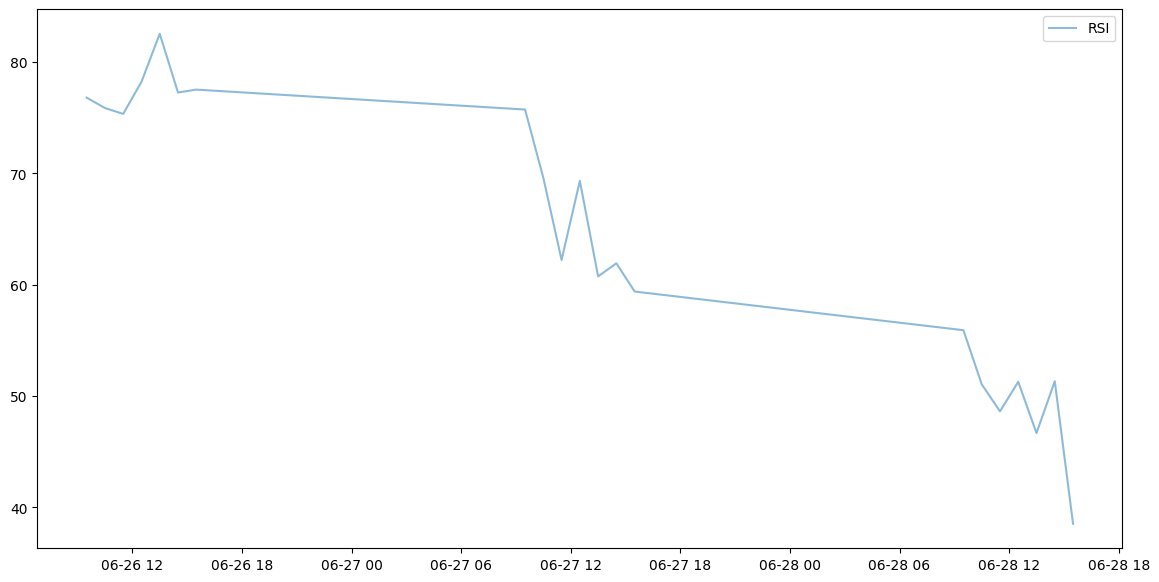

[*********************100%%**********************]  1 of 1 completed


TSLA
0


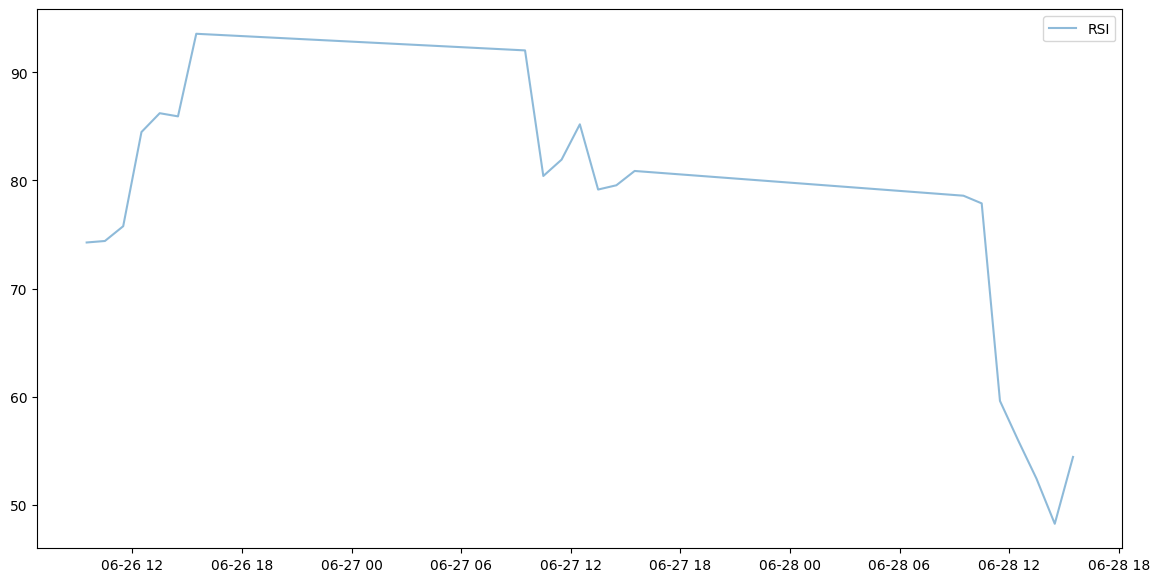

[*********************100%%**********************]  1 of 1 completed


META
-1


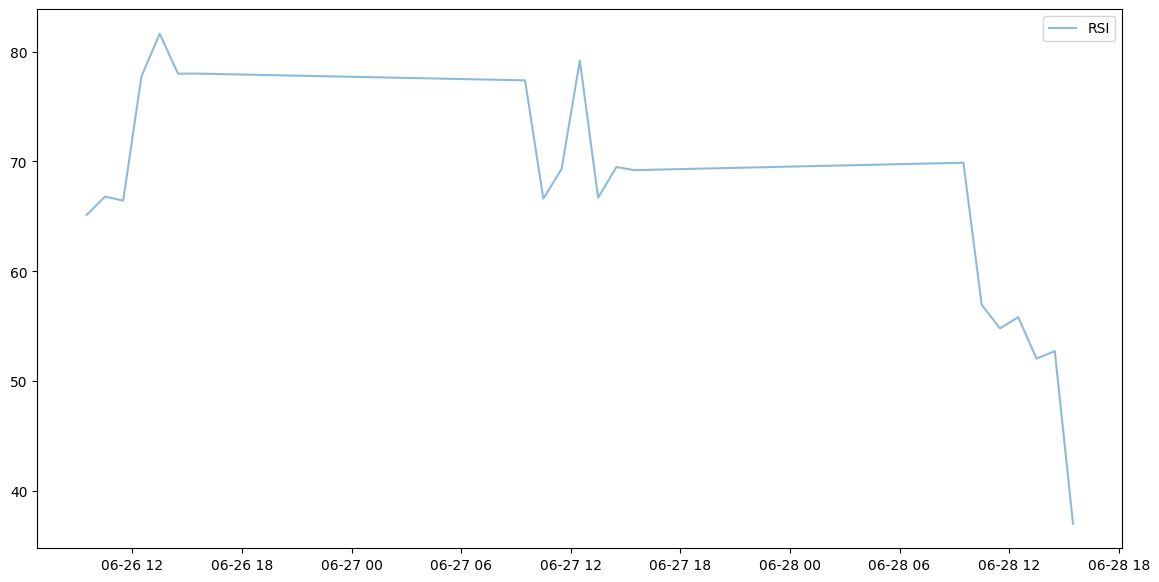

[*********************100%%**********************]  1 of 1 completed

NVDA
0


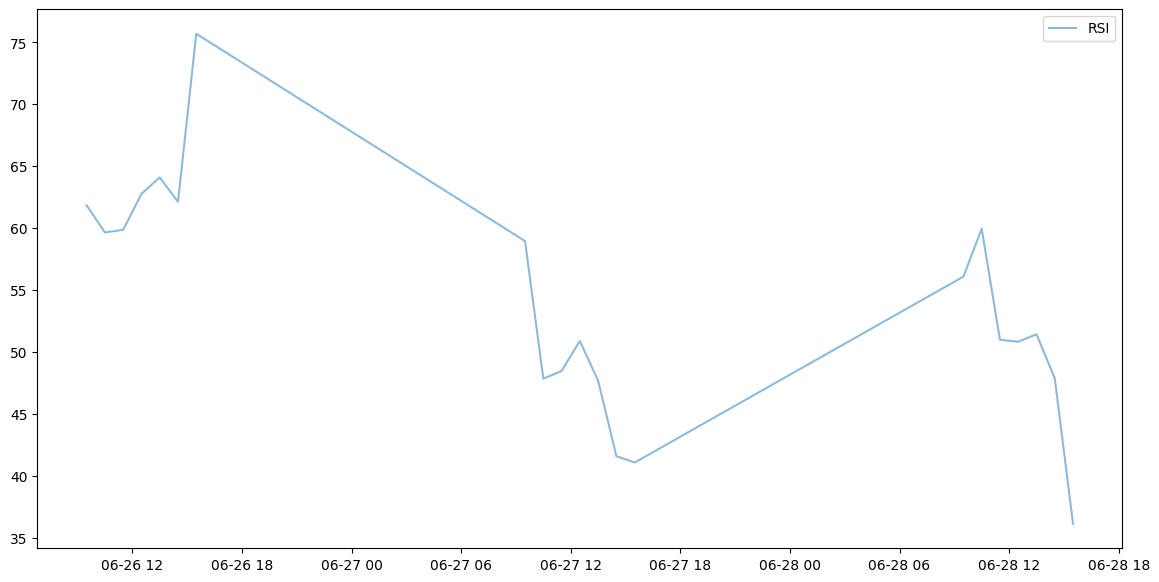

[*********************100%%**********************]  1 of 1 completed

AAPL
0


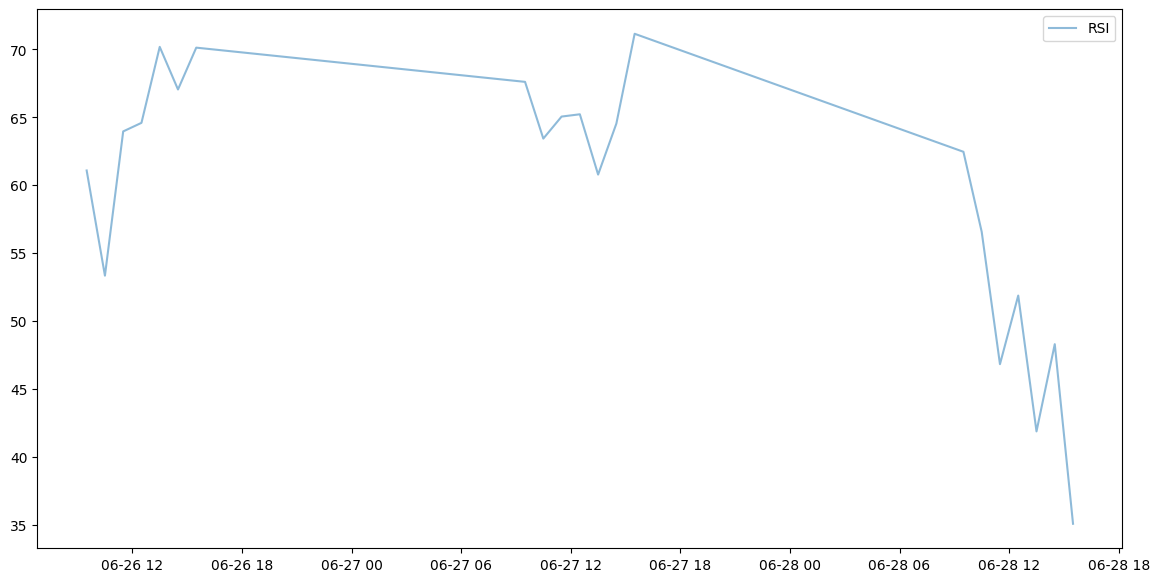

[*********************100%%**********************]  1 of 1 completed


EBAY
0


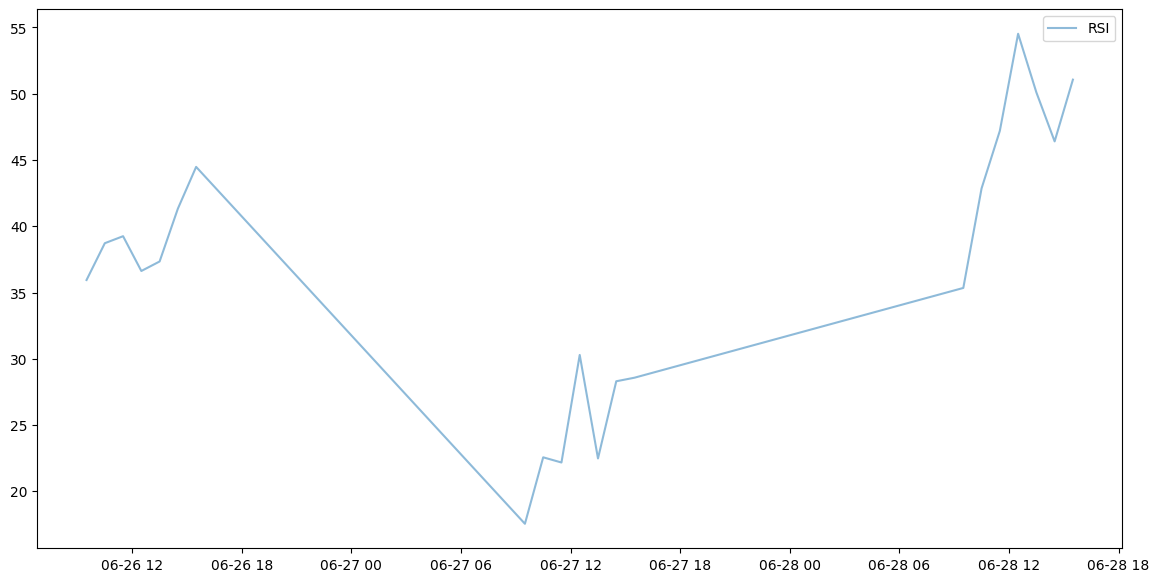

[*********************100%%**********************]  1 of 1 completed


AMZN
0


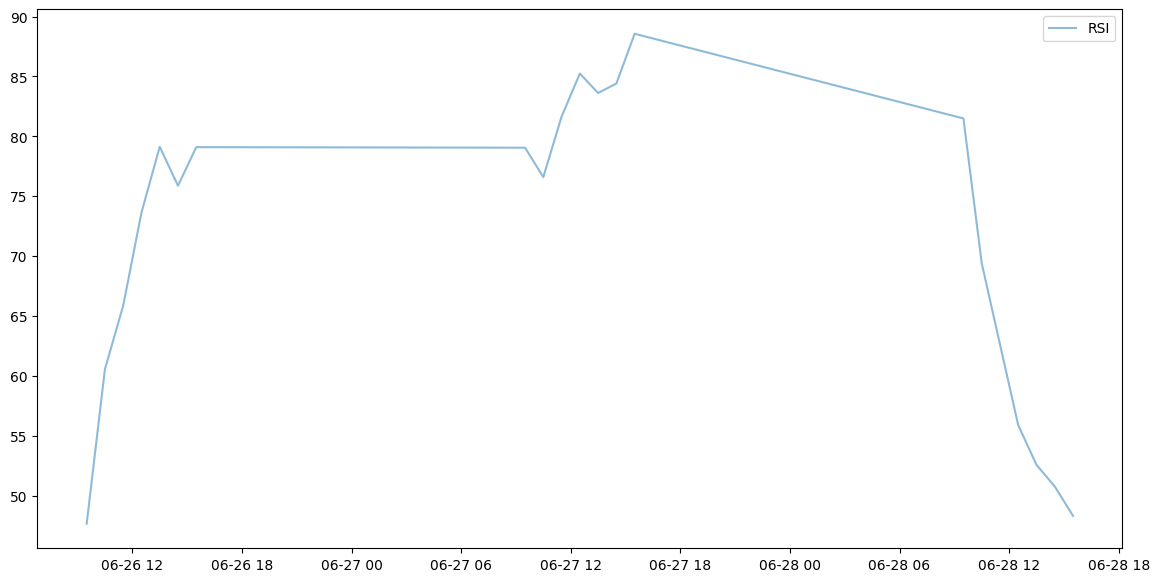

[*********************100%%**********************]  1 of 1 completed

NFLX
0


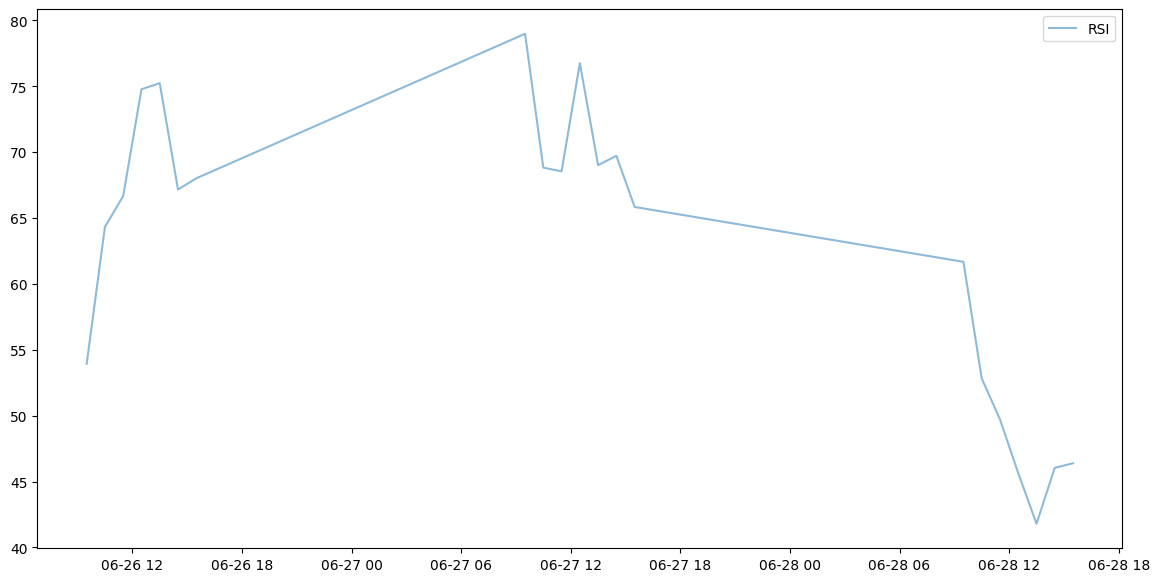

[*********************100%%**********************]  1 of 1 completed


MSFT
0


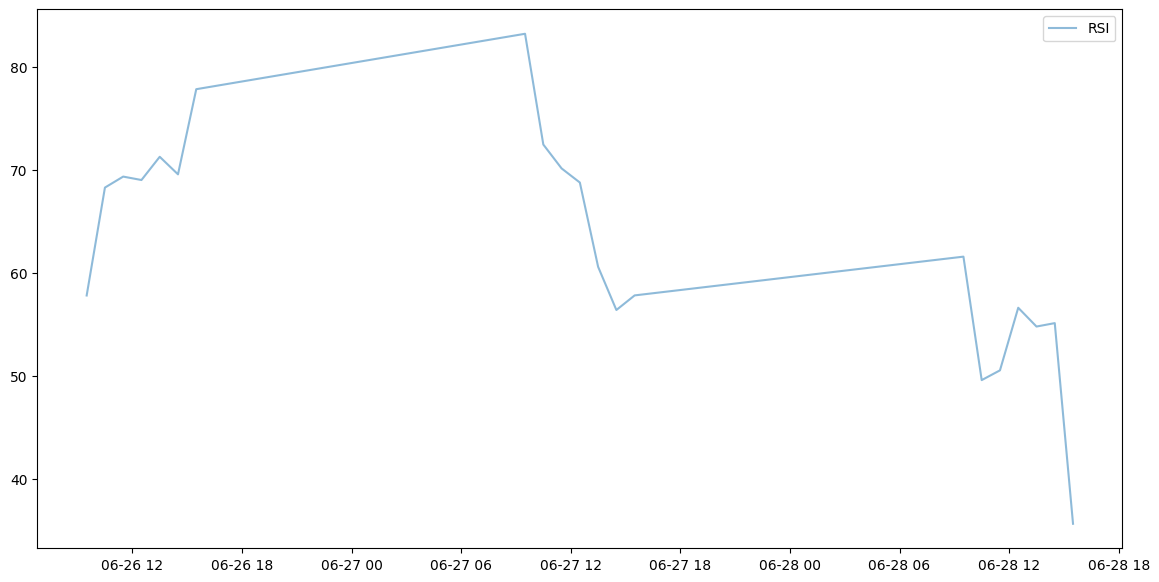

[*********************100%%**********************]  1 of 1 completed


INTC
-1


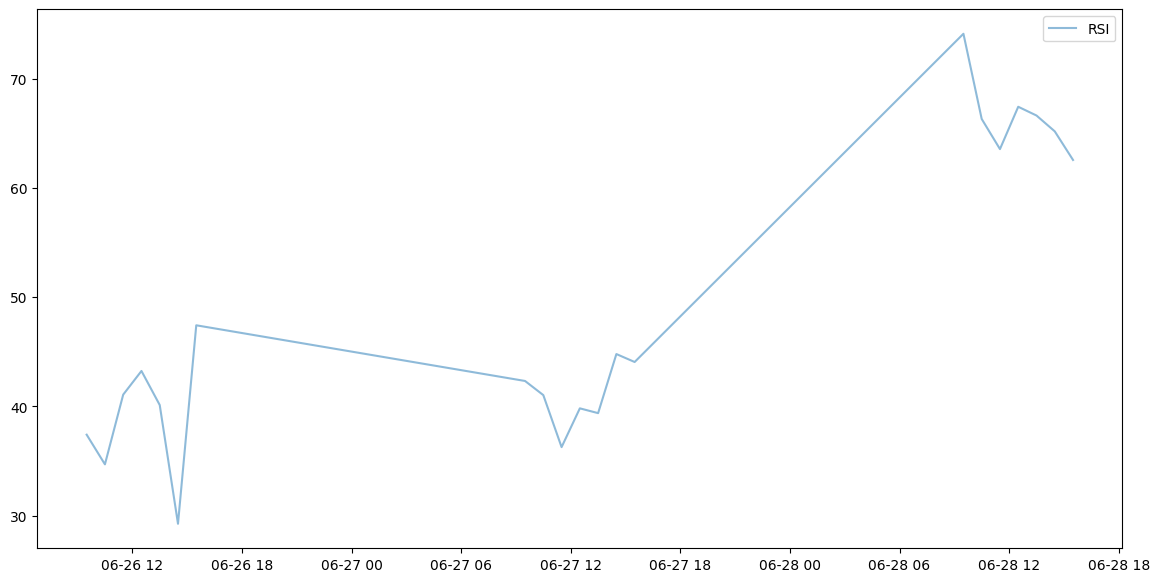

In [13]:
# the graph shows the RSI of every 6 hours, an upward trned is usually followed by a downward trend
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, period = "5d",  interval = "60m")
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed

GOOG
0


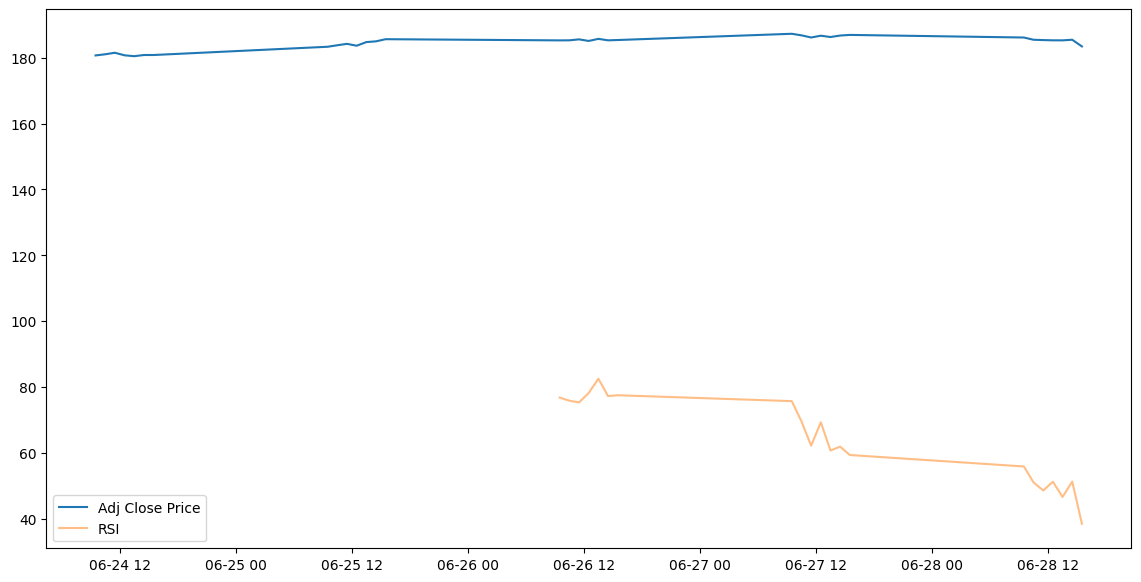

[*********************100%%**********************]  1 of 1 completed


TSLA
0


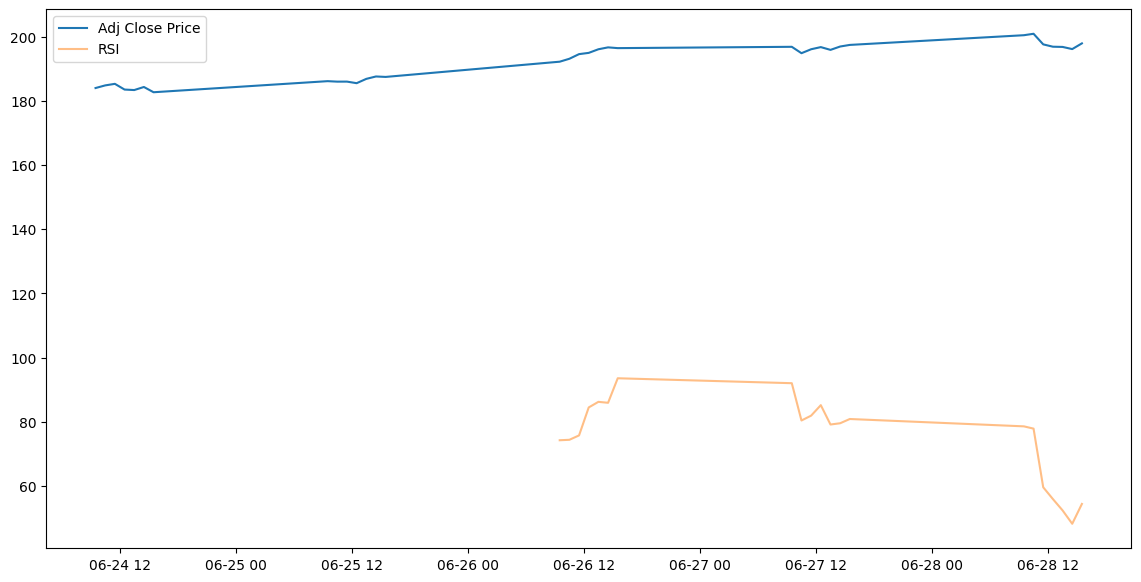

[*********************100%%**********************]  1 of 1 completed

META
-1


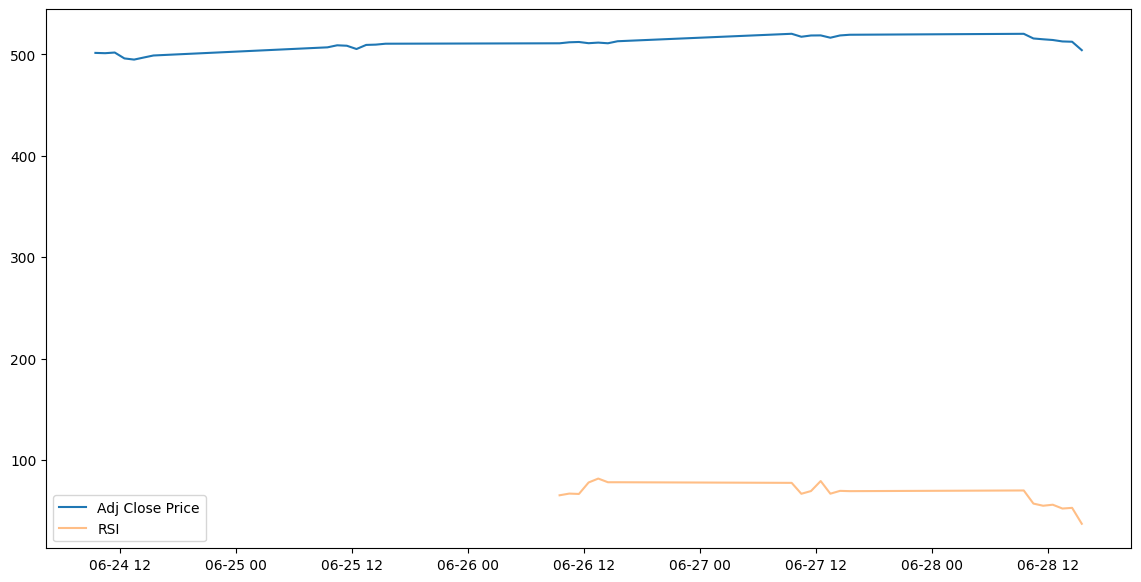

[*********************100%%**********************]  1 of 1 completed


NVDA
0


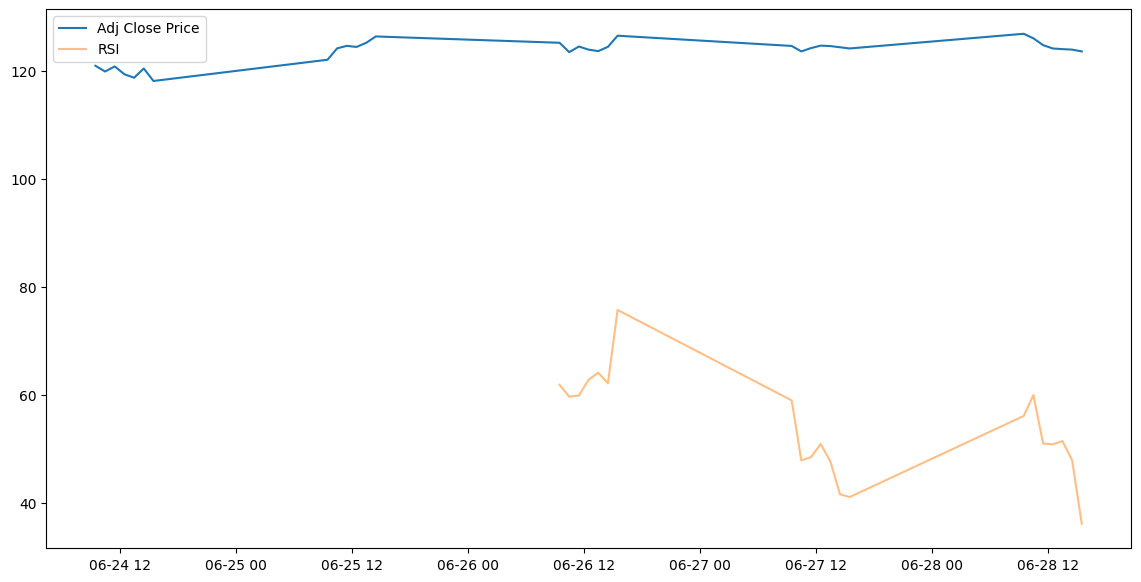

[*********************100%%**********************]  1 of 1 completed


AAPL
0


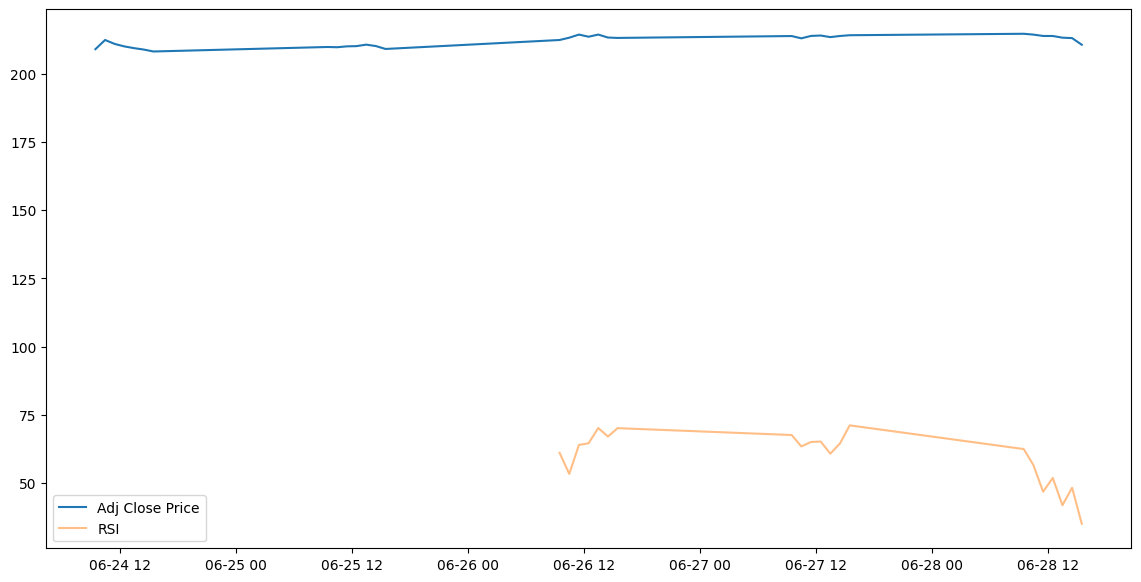

[*********************100%%**********************]  1 of 1 completed


EBAY
0


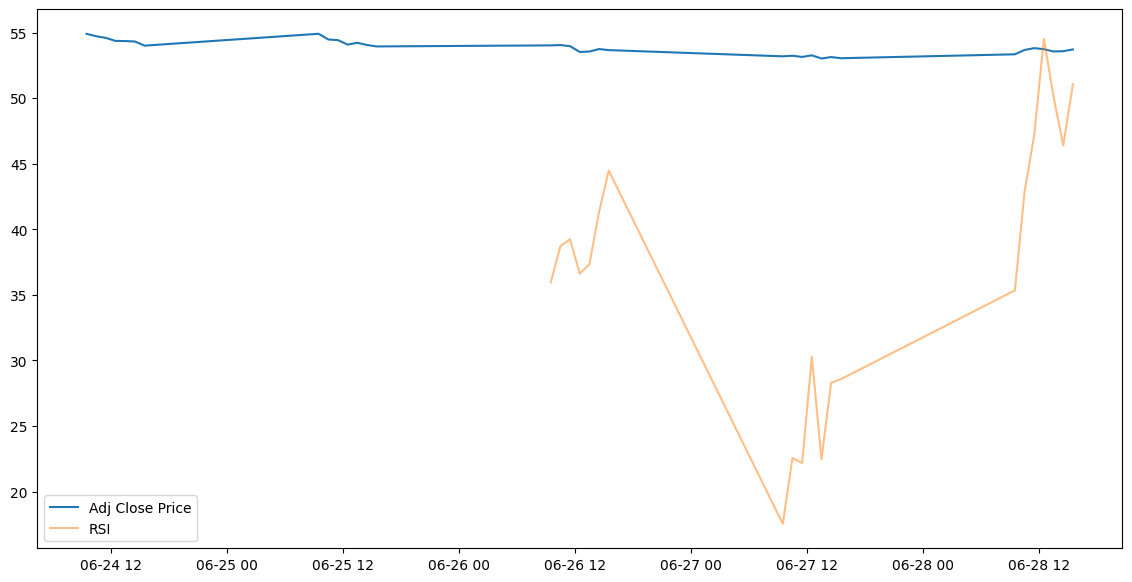

[*********************100%%**********************]  1 of 1 completed


AMZN
0


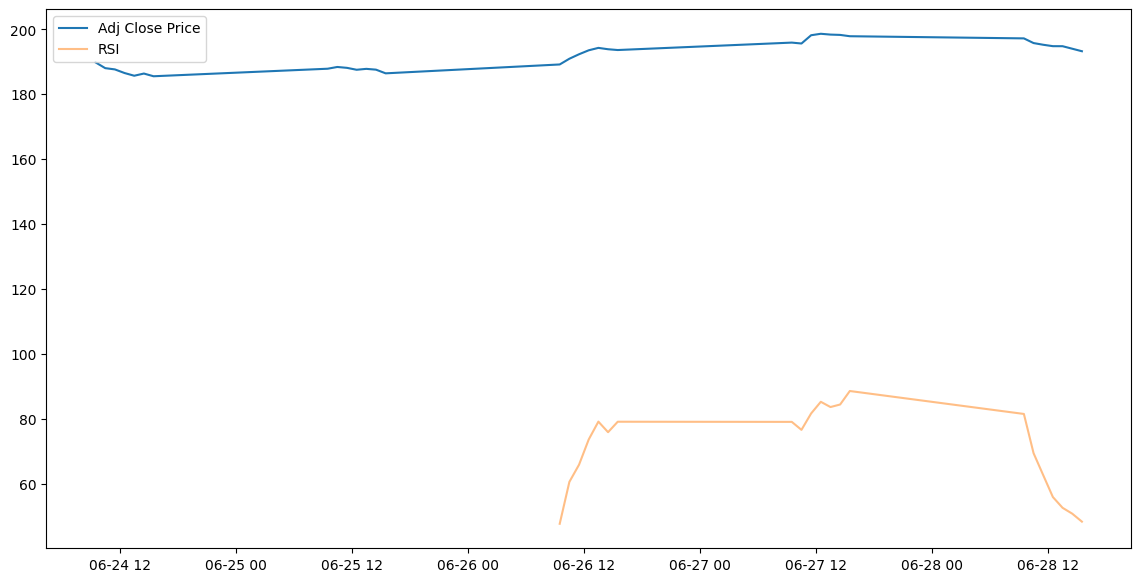

[*********************100%%**********************]  1 of 1 completed


NFLX
0


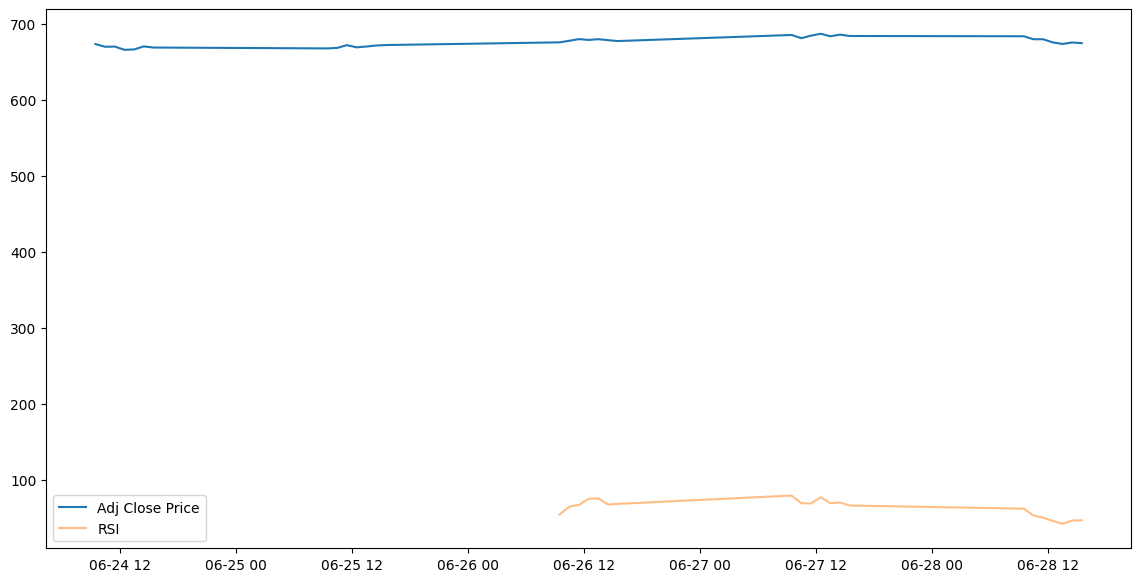

[*********************100%%**********************]  1 of 1 completed

MSFT
0


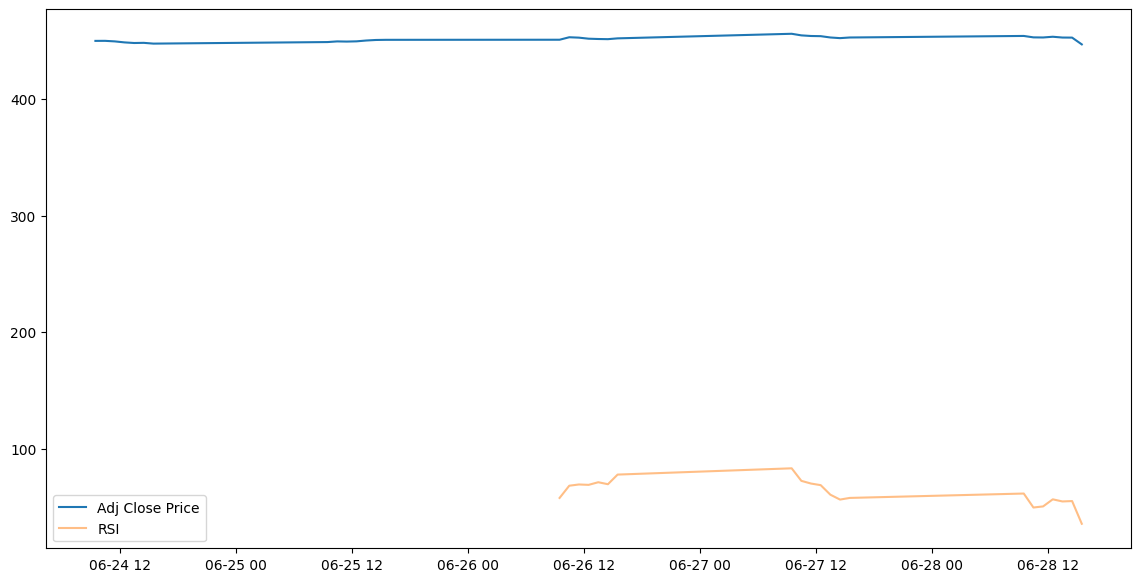

[*********************100%%**********************]  1 of 1 completed


INTC
-1


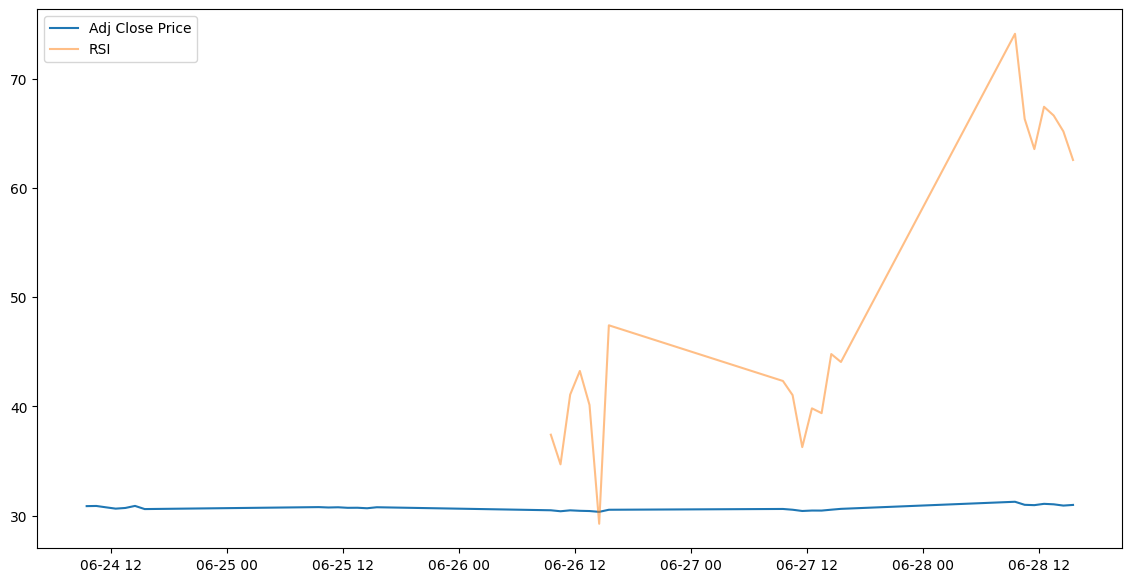

In [14]:
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, period = "5d",  interval = "60m")
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

Conclusions: For long term investing, such as weekly, there isn't a clear trend. For example when the RSI is in between 30 and 70 you keep the stock, however the stock doesn't stay around the same price as you expect it to and rather increases/decrease. Sometimes it is accurate, when rsi is above 70 you sell and the stock goes down and vice versa but using only RSI is not an accurate way to predict trends. For daily trends there is also not a very consistent predicition based on RSI. An upward trend in RSI is usually followed by a downward slope. Greater RSI/upward trend signals it should be sold therfore leading to a downward trend/lower RSI.